## CSCS530 Winter 2018
#### Complex Systems 530 - Computer Modeling of Complex Systems (Winter 2018)

  * Course ID: CMPLXSYS 530
  * Course Title: Computer Modeling of Complex Systems
  * Term: Winter 2018

In [23]:
%matplotlib inline

# Imports
import copy
import networkx as nx
import numpy
import matplotlib.pyplot as plt
import pandas


# Import widget methods
from ipywidgets import interact
import ipywidgets as widgets

In [24]:
# Create a random graph
nodes = 100
edges = 2
prob_out = 0.25
g = nx.newman_watts_strogatz_graph(nodes, edges, prob_out)
print((g.number_of_nodes(), g.number_of_edges()))

(100, 128)


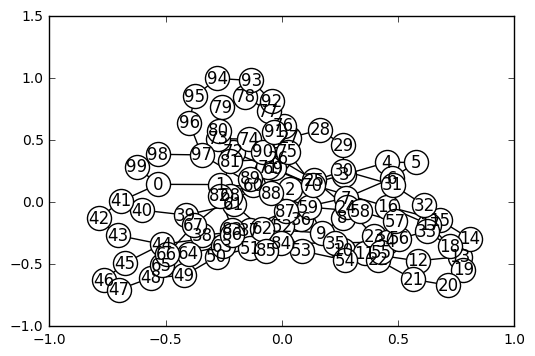

In [25]:
# Draw the random graph
g_layout = nx.spring_layout(g, iterations=50)
nx.draw_networkx(g, pos=g_layout, node_color='white')

In [26]:
# Pick a random person to infect initiallydata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAhcAAAFkCAYAAACThxm6AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAAPYQAAD2EBqD+naQAAIABJREFUeJzsnXlYVOUex3/vgWEYhn0TFFRwATQNRQUtd0TUEAsUzQ0E%0ASzTTFi27amloaoUGrglqKSq30iwrc8vMe8UtswXz5oKPpbmVICq48L1/4DnNzgzMwAy8n+eZPzhz%0AzuGdM2fO+Z7f8n0ZAOJwOBwOh8MxF0JdD4DD4XA4HE79gosLDofD4XA4ZoWLCw6Hw+FwOGaFiwsO%0Ah8PhcDhmhYsLDofD4XA4ZoWLCw6Hw+FwOGaFiwsOh8PhcDhmhYsLDofD4XA4ZoWLCw6Hw+FwOGaF%0AiwsOh8PhcDhmpVbEBWNsEmPsHGPsDmOsgDHWuYr1RzLGfmCM3WKMXWSM5TLGPGtjrBwOh8PhcGqG%0AxcUFYyyJiN4loteJqAMRnSCirxlj3nrWf4yIPiCi1UTUhogSiagLEb1v6bFyOBwOh8OpOczSE5cx%0AxgqI6BCAKQ//ZkR0gYiyACzSsf5LRDQBQCuVZc8R0XQATS06WA6Hw+FwODXGopELxpiMiCKIaI+4%0ADJVqZjcRddWz2UEiCmSMDXi4j0ZENJSIvrDkWDkcDofD4ZgHewvv35uI7Ijossbyy0QUomsDAP9l%0AjI0ionzGmCNVjvEzInpO1/qMMS8i6k9ERURUZp5hczgcDofTIHAkouZE9DWA6+baqaXFhckwxtoQ%0A0XtE9AYR7SQifyJ6h4hWEVGajk36E1FebY2Pw+FwOJx6yEgi2miunVlaXFwjogdE1EhjeSMi+lPP%0ANq8S0X8AZD78+2fG2EQi+o4x9i8AmlGQIiKiDRs2UFhYmHlGzamSF154gRYvXlzXw2hQ8GNe+/Bj%0AXvvwY167nDx5kkaNGkX08F5qLiwqLgDcY4wdI6K+VJnaEAs6+xJRlp7NnIjorsayCiICETEd65cR%0AEYWFhVHHjh3NMWyOEbi5ufHjXcvwY1778GNe+/BjXmeYtaygNnwuMoloPGNsDGMslIhWUqWAWEdE%0AxBh7izH2gcr6nxNRAmNsAmMs6GFr6ntU2XGiL9rB4XA4HA7HSrB4zQWAfz/0tJhLlemQH4ioP4Cr%0AD1fxI6JAlfU/YIw5E9Ekqqy1uEGV3SavWnqsHA6Hw+Fwak6tFHQCWE5Ey/W8l6Jj2TIiWmbpcXE4%0AHA6HwzE/fG4RTrUYMWJEXQ+hwcGPee3Dj3ntw495/cDiDp2WhjHWkYiOHTt2jBcBcTgcDodjAt9/%0A/z1FREQQEUUA+N5c++WRCw6Hw+FwOGaFiwsOh8PhcDhmhYsLDofD4XA4ZoWLCw6Hw+FwOGbF6uYW%0A4XA4HFuitLSUTp8+TeXl5SSXy6lly5bk7OzMx8Rp0HBxweFwOCZSWFhIK1eupF27dtGpU6dIteuO%0AMUYhISHUr18/mjBhArVp06bBjonTcOFpEQ6HwzGSc+fO0YABA6ht27aUn59PvXv3ptzcXCooKKAf%0Af/yRCgoKKDc3l3r37k35+fnUtm1bGjBgAJ07d65BjYnDIQA2/SKijkSEY8eOgcPhcCzF6tWroVQq%0A0axZM+Tl5aG8vNzg+uXl5cjLy0PTpk2hVCqxevXqBjEmjm1x7NgxUOXEoB1hznuzOXdWFy8uLjgc%0AjqXJyMgAESEtLQ0lJSUmbVtSUoK0tDQQETIyMur1mDi2BxcXXFxwOJw6YPXq1SAivPnmmzXaz9y5%0Ac0FEyMnJqZdj4tgmlhIXvOaCw+Fw9HDu3DmaOnUqjR07lu7du0cDBgwgLy8vEgSBPvzwQ7V1AdC6%0AdesoPj6emjZtSs7OztSuXTuaN28elZeX08yZMyktLY2mTJlSo3oHU8ZERJSTk0O9evUiPz8/cnR0%0ApODgYBo3bhydP3/ebGPicDTh4oLD4XD0MHHiRPL29qZp06bRm2++Sb/++iuFh4cTY0xr3du3b9O4%0AcePo2rVrlJ6eTu+99x5FRkbS66+/TgMHDiTGGL377rvk5eVFEydOrJUxEREdP36cgoOD6ZVXXqGV%0AK1fS6NGj6auvvqIuXbrQ5cuXzTImDkcLc4ZB6uJFPC3C4TQobt68iePHj6OgoADHjx/HzZs3LfJ/%0AfvnlFxAR8vLycPfuXVy+fBkAcPToUTDG8MEHH6itf/fuXRw8eFBrP3PnzoUgCNizZw8AIC8vD0SE%0AwsJCi49JH8eOHQNjDAsXLqzxmDi2DU+LcDicBkthYSE9//zzFBYWRq6urtShQweKioqiDh06kKur%0AK4WFhdHzzz9PhYWFZvufK1euJF9fX0pMTCSZTEa+vr4G15fJZBQVFaW1/MknnyQAdPLkSSIiSkhI%0AIF9fX1qxYoXFx6SPZs2aERHRjRs3ajwmfZSWltIPP/xAhw4doh9++IFKS0vNtm+O9cNNtDgcjtVy%0A7tw5mjhxIu3YsYN8fX0pISGBpk+fTm3atCEnJye6ffs2FRYW0pEjRyg/P5+ys7MpNjaWli9fTkFB%0AQTX637t27aKEhARycHCo0X4uXbpERETe3t5ERCSXyykhIYF2795dq2P666+/6MGDB3T+/HmaO3cu%0AMcaob9++NR6TKtzIiyNhzjBIXbyIp0U4nHpJXXo4lJSUgDGGNWvWaL1nagoiOjoa7u7uKC4ulpbl%0A5uaCMWZSSqemY3J0dARjDIwx+Pj4YOnSpWrvV2dMImfPnkVsbCyICL6+vkhPT8eaNWtQUFCAH3/8%0AEQUFBVizZg3S09Ph6+sLIkJsbCzOnj1r8v/imBdLpUV45ILD4Vgd8+bNkzoZMjMzycXFpcptHBwc%0A6Omnn6a4uDh68cUXafz48XT58mX617/+ZfL/P3PmDAGo8dP1/Pnzae/evbRixQpydXWVlrdt25YA%0A0IoVK6h58+ZGXayLiopqNKYdO3ZQWVkZnTx5kjZs2EC3bt1Se18c0+nTpyk8PNzo/ebk5NDUqVPJ%0A29ub8vLyKDExUWdkJTIyklJSUmjJkiX08ccf04wZM6hdu3a0ZMkSSktLq9Zn4lgx5lQqdfEiHrng%0AcOoV1uDhUFBQACLCjz/+qPWesZGLzZs3QxAEPPPMM1rvnThxQnxaNPlVkzGJnDlzBgqFAsuWLdMa%0AU0FBgVH7ALiRV32AF3RyOJx6j6keDkeOHKGJEydSp06dyMHBgezs7KT3auLhIJfLiaiyvbQ67Nq1%0Ai8aOHUtxcXE6iyTv3LlDRET79++nGzduUHFxMZWUlNDNmzeptLSUbt26Rbdv36Y7d+5QWVkZlZeX%0A0+HDh2s0JlWCg4OpQ4cOlJeXpzUm8bNXRU5ODs2cOZNmzZpFjRs3pmHDhhn8rlS5f/8+RUZGUm5u%0ALvXv359mzpxJubm51f9AHKuDiwtOvYNXqdsupno4fPnll7RmzRoSBIFatGih9l51fCX+/PNP+vTT%0AT6WbY3W6Tw4dOkRPPfUUdenShfLz80kQtC+zv/zyCzHGqEOHDuTm5kaurq7k4uJCzs7OpFQqycnJ%0AiRQKBTk6OpJcLicHBwcKCwsjxpjZOmLu3LlDxcXFWmMyphBWFIFpaWmUmppq1HelSlZWFl24cIEY%0AY9SvXz9u5FUP4eKCUy+orVZFLlwsR2FhIe3YsYPmz59PrVu3pj///JPOnTtHixYtElOgWkycOJGK%0Ai4vp8OHDFB0drfW+q6srvfXWW7Rjxw6pFVSkvLycCgoKaMmSJTR8+HBq3rw5+fv705NPPkkfffQR%0Aubu705EjR0z6DCdPnqQnnniCgoOD6fPPP9cbBTh69CiFhoaSs7Oz0ft2dnamkJAQk8b04MEDqd1U%0AlcOHD9NPP/1EnTt3VhuTvb09BQUF0ZAhQ2jJkiX0ww8/UEVFhdb2ogjMzMykxo0bG/VdiVy5coXe%0AfPNNevXVVwmA2czFONZFrRR0MsYmEdHLRORHRCeIaDIAvb8QxpgDEb1ORCMfbnORiOYCWGf50XJs%0AidpoVeTtdbVDdTwcfHx8qlwnISGBXnjhBVq4cCHFxsZSQUEBFRQU0PHjx+nu3bvk6OhIERERlJiY%0ASFFRURQVFUUBAQH0/PPPU35+Pi1ZsoQcHBxo2bJldOPGDfrjjz+IiOizzz6jCxcuEBHR888/T4wx%0A6t+/P924cYOmT59O27dvVxtHixYtKCoqisrLy+mTTz6hpKQkk49Rv379TBpTRUUFBQYGUlJSErVt%0A25aUSiX9+OOPtG7dOvLw8KCZM2cSEUljiouLo0cffZT27dtHr776KpWXl5OHhwf16NGDevXqRb16%0A9SJ7e3vasWMH5eXlSYW2pvhtvPrqqxQWFkYjR46kWbNmEdE/InDkyJF08uRJCgsLM/nYcKwMcxZw%0A6HoRURIRlRHRGCIKJaJVRPQXEXkb2GYbEf2XiHoTUVMiiiSirnrW5QWdDRRLtyry9rraJTQ0FOnp%0A6VrLjS1WfO655yAIgs730tPTIZPJQERo0aIFRo4ciezsbBw5ckTveaPqhgkAzZs3hyAIOl/nz59H%0AUVGR3vcFQUBKSgoA8zl0GjOmu3fv4oUXXkB4eDjc3d0hl8sRFBSEZ555BufPn5f2q2tMd+7cwbff%0Afos5c+agd+/ekMvlICLI5XJ4eXnpPG5VfVeHDh2CnZ0dDh06hKKiIjDG8O677wIAysrK4Ovri8mT%0AJ5t8XDjVx2ZnRSWiAiJ6T+VvRkS/E9F0PevHPhQf7kbun4uLBoilq9Tr0mOhIWIOXwlD4kL0cDBV%0A+MXGxqJZs2Ymn2P6KC4uRtOmTREbG1vtfdTVmO7cuYN9+/ZJQlsXVX1XXbp0wahRowBAS1wAlSIw%0ALCzM4Dhqy/69oWCT4oKIZER0j4gGayxfR0Rb9WyzjIh2EtFbD0XIKSJ6m4gc9azPxUUDQ2xVbNu2%0ALYKDg+Hk5ARvb2/06NEDn3/+ubReRUUF1q5di8GDByMwMBBKpRKPPPIIMjIyUFZWprdVkbfX1T7H%0Ajx/X2wZpDnEhtpYeP37cpHGdPXsWSqUSaWlpJm2ni4qKCqSlpUGpVNYoulWXYzIkAgHD39WaNWug%0AVCrxxx9/ANAtLvQZef3yyy+YPHkyQkNDwRhTa81ljCE0NBSTJ0/GL7/8YsrH58B2xYU/EVUQUaTG%0A8oVEdFDPNl8R0R0i+oyIOj2MZJwjolw963Nx0YAQL6z9+/fHgAEDMHfuXOTk5CArKws9e/YEY0yK%0AGpSWloIxhm7dumH+/PnIyclBamoq7Ozs0KdPH50XVmvwWGiImMNXwpC4qI6Hg4g5zomKigqznhN1%0ANSZDIhDQ/12VlJTAz88Pc+bMkZbpEheaIpCnJi1PQxIXXxPRLSJyVln2JBHdJyK5jvW5uGhAGAoJ%0AV1RUIDw8XAqrGjNLpWpIWBQuCQkJGDp0qMGoCFB5ge/ZsycaNWok5bJTUlJQVFRktqfUhoK1Ri5E%0AahLNKi4ulqJZ8+bNq9b/t5YxGRKBgP7vatasWfDy8sLJkydRVFSEoqIifPfdd2CMYebMmSgqKsLd%0Au3fVRCBPTdYOtiouqpMWWUdE/9NYFkpED4iohY71OxIRevTogbi4OLXXxo0bzfYFcOoezWI2XcTF%0AxcHf39/gfn766ScwxqS5FcRitu7du6NZs2b4+OOPq4yKAMDEiRORkpKCzMxMrF27FrNnz4afnx98%0AfX1x6dIls+TXrQ1L5btv3rxZKzUXNRmveLNr2rSpUTe7srIytZudJaJYtT2m6kYukpOTIQiCNLeJ%0A+BKXCYKAEydOSOJl0qRJPDVpATZu3Kh1n+zRo4ftiQtAb0HnBSKapmf98URUSkROKsviH4oUHrlo%0AwEyePBm+vr5qF9Bbt27h2rVrOHPmDDIzM2Fvb4/Ro0cb3M/OnTvBGMPmzZsBVF5wPT09DQoXzaiI%0APo4dOwbGGBYuXAig+p0B1lS0Vlv5bkt3i1T13RmDrjB9bm4uCgoKpJtjbm5urYbpa3NMhkQgoP+7%0AOn78OLZt26b2Wr16NRhjGDduHD777DOUlJQgNzdXOrd69eqF2NhYeHp6gjGGVatWaf0mkpOTtQQL%0AYwxhYWE8NWkkNhm5QOXNfxgR3Sb1VtTrROTz8P23iOgDlfWVRHSeiPKJKIyIelBlUedKPfvn4qIe%0AYeimquvmM2HCBOmCYmdnh2HDhuHGjRsG/4euWSrbtWunt71OxJioyLVr18AYw4wZMwCY1l5nbUVr%0AtZnvrqioQHx8vNp3sHTpUmRkZCA9PR2MMSQkJCAjIwMZGRnS0+z58+elZVFRURAEQfp7/fr1ACzT%0A4ih+V2FhYTq/q7CwMEyePLla7abWPiZdv0NjvitNdNVcjBw5Evb29khKSgJjDE2aNEFAQIDaZ1H9%0ATG5ubrC3t8eiRYuQl5cnvbZv385Tk0Zis+IClQJgIhEVUWWh5kEi6qTy3loi2quxfmuqrL0ofSg0%0AFumKWoCLi3qBMTfVZ599VucT06lTp7Bnzx6sX78ecXFxSEhIwOXLl/X+r3nz5kEQBKxatUpteePG%0AjbUumMZGRa5fv44rV67gyJEjiIuLgyAI2L17t/R+VU/N1li0Vlv57rKyMqxbtw7t27eXvnNjPRwA%0AYN++fVJYXfPVu3dvADXzlTAGa4oy1caYdEUQjfmuNBF9QVR9LuRyOQICAnDs2DH07t0bRAQPDw8Q%0AEVJTU7V+EyEhIdI1Q9dvoj6mJs2NTYsLS764uLBdTLmpiheYqqr9Y2JiEBkZqfM9fbNU6muvMzYq%0A4ujoKK3n4+Mj1XKIGMr3W2PRWm204l6/fh3z5s2Dv78/iAiDBg3C3r17rdJXgqOOMbVP1WHhwoXS%0Aeaf6mzh48KDetFhycjJcXFywfv16BAQE6PxNWFpc2jpcXHBxUa8w9ab63XffGaxSF3n//fchCAL+%0A97//qS3fuXMn5HI54uPj8eDBA7X39BWpGRsV2bdvH3bs2IHFixcjIiJCqrcQ0depYI1+GpZuxf3t%0At98wadIkODk5QS6XY/z48WoXfWv0leBoYwkR6OzsDIVCofWbMFRzk5ycDDs7OyiVSjDGJBfR2bNn%0AS+tw50/DcHHBxUW9oTo31aqq1EXee+89CIKAI0eOSMsKCgrg7OyM7t27o6ysTGubqtrrRAxFRUTO%0AnDkDhUKBZcuWSct0eSxYo5+GeGMfO3YsZs+erVZMp6+Y8uTJk+jfvz+cnZ3h6emJ0aNH4+rVq2o3%0A9jNnzuC7777DkCFDpOjOG2+8oTd9ZY2+Ehx1zC0CRf8ZXd+7IXHx2muvYcaMGfjoo4+Qn5+PlJQU%0AKU3y/vvvS+uZq6C3PsLFBRcX9QJj3TUB4PDhw0hPT0dERIQ0L4SYurhy5YrWvu/du4eOHTtCqVTi%0A1q1bAIDCwkJ4e3ujffv2egs9jRUu+qIimnTr1g3dunWT/tZlDKRQKBAUFFTlMdD8fGKxnpinNufT%0Aufg0+vPPP4MxhubNm6NPnz4QBEHnhf3333+Ht7c3WrVqhaVLl+Ktt96Cp6cnOnTogHv37qG4uBiB%0AgYFSSis0NBTvv/8+bt++XeVYrNFXgqOOuUWgIAho1aqVzu4Psf7q4sWL0rb6hO28efOkKIb4mzBH%0AK3J9hYsLLi5sHlPcNQHgjTfegFwuR+fOnREaGgoikooun3zySfTt2xdz5sxBTk4OMjIyEBYWBkEQ%0AsGTJEgCVRW2BgYFSNfmGDRvUXqLBVlXtdSK6oiK66NChA9q2bSv9rXlhi42Nha+vL/r161flMVDl%0A3XffhbOzs1oRHGCeugLVPPrdu3elqIKhp8b09HQolUr8/vvv0rLdu3erfQYx371ixQqtdFRVWKOv%0ABEcdc4nAZs2aoUmTJtizZ49a10deXh7efPNNEBECAgKkbQ0J25s3b0qpEvE3UVMTtfoMFxdcXNg8%0AprhrApXRCTGN8dxzz4ExJlWp5+fnIyYmBv7+/nBwcICXlxdiYmKwfft2aXtjZ6ksKyuDo6OjJFyM%0AiYrcv38ff//9t9Z6hw4dgr29PZKTk6Vl4k145syZ+Oijj/QWwxny0rh8+TLc3d2RkZGh1b4H1Lxo%0ATVcHAGBYXDRq1AhJSUlay0NCQtCvXz8ANc93W6OvBEedmopAMXKhr0A0JycHRIRhw4ZJy6oStr6+%0AvujcubP0m6iJ/Xt9h4sLLi5smpq6a4oGSZaoUhdvzOLN1ZioyI0bN+Ds7IzU1FRkZmZi1apVmDRp%0AEpRKJXx8fHD69GkAlRdSHx8fhISEwN3dHURk0E9D3zFISUlB165dce7cOZ3ioqY3cVMNrP744w8w%0AxvD2229rbTN69Gh4e3tLf5sj322NvhKcf6iJCNQnbEUSExNBRMjMzJSWGRK2Yipv/Pjx0m+CRy70%0AYylxYU8cTi2wcuVK8vX1pcTERGnZ7du36c6dO1RcXEzbtm2jr776ikaMGGFwP7GxsfTaa69RXFwc%0Aubi41HhcJSUlNGPGDHr88cfpwIED9PHHH9Pw4cMpNzeXVq5cSdevXycXFxeKiIigt99+mwYNGkRE%0ARE5OTjR+/Hj65ptv6JNPPqE7d+5Q48aNaeTIkfSvf/2LmjZtSkREn3zyCV29epW+/fZbatmyJbVq%0A1YoGDhxIDg4ORh+Dw4cP04cffkj//e9/iTGm83PI5XJKSEig3bt3m3wMbt68SadOnaLp06cbvc2l%0AS5eIiMjf31/rPX9/f/rrr7/o3r17JJPJqFOnTrRy5UoqLS0lZ2dnk8dHRNSmTRvKysoiIqLS0lI6%0Affo0lZeXk1wup5YtW1Z7v7WJrY7bGIKCguirr76iwsJCWrlyJe3evZtWrlwpPgASERFjjEJDQykp%0AKYnS09MpLCyMiIh27dpFCQkJ0m9Clfv370vntJeXFxERXbx4ka5cuULh4eFa51SXLl3o448/JiKi%0AJ554guzt7Wn37t0UHh5ORJW/t0OHDtW742+VmFOp1MWLeOTCJqipu6YYubBkq6KlPRZ0+WkYcwy6%0AdOmCUaNGAdDtaihS3aK16kwaJk469dFHH2ltM3v2bAiCIDmgNuSnRmtzXa1NjDHyMjSF+9KlSzFq%0A1CjpeImun6IL6JIlS+Dh4YGJEyciKysLWVlZCA4OBhFhwIABACDVa3h5eel0+KzPx99YeOSCY7Po%0AezJ+4YUXaOjQoXTx4kX697//TQ8ePKDy8nKD+woKCqIlS5bQ+PHjqVmzZjRz5sxqjQkAZWRkUE5O%0ADuXk5FBQUBAtX76c2rVrRy+++CKtXr26WvtV3f9LL71E169fp+XLlxMR0ZkzZwgAtWnTRlqvqmOw%0Adu1a+uWXX2jr1q1V/s+2bdsSADp9+rT0pGYM4v9zcnIyehuFQqG2rSplZWVq6xhat75y7tw5mjhx%0AIu3YsYN8fX0pISGBpk+fTm3atCEnJye6ffs2FRYW0pEjRyg/P5+ys7MpNjaWli9fTkFBQXU9fLPg%0A7Oxc5Xmo6zch8s4771BRURERVUY9tm7dSlu3bpWiIR4eHhQXF0e7d++mDz/8kB48eEAuLi7EGKN5%0A8+bRgAEDaMeOHeTp6UnDhg2jzp07N6jjX+eYU6nUxYt45MLqMbbV05CPhOakVJZqVbSkx4Ixfhox%0AMTHo0qWLNE4/Pz/MmTNHet9Q5KK6RWvViVyYUnPR0CIX1ui6aq0Y+k2UlpZCqVQiPj5ebbl4Tm7Y%0AsEFrm+nTp4MxBicnJ378jYQXdHJxYbMYa1JlyEdC14yX4kU8MDDQrK2KlhIuxogs1WMwa9YseHl5%0A4eTJkygqKkJRUZGUjpg5cyaKiopw9+5dadvq3sSrO925r6+v3qK66Oho6e+G5DFgja6r1oyh38T6%0A9eshCAL+/e9/qy03JGzDw8P58TcRLi64uLBZauKuKaJvOu2zZ8+ia9euZm9VtITHgjF+GkuWLJGO%0AQXJyMgRB0DIUEpcJgoATJ05I21b3Jn7z5k00b94cTz31lFZuvLo+Fw3RHdGSrqvWODmaOTD0m4iN%0AjYWrqyvu3Lmj9Z4uYSsef3pYT6HrJZpwaRr0qV5bGpqzKxcXXFzYLJoXEGPdNVXRJy6AypsqEWHC%0AhAlmbVW0hMeCWNhqzDE4fvw4tm3bpvZavXo1GGMYN24cPvvsM7WnM1Nu4lUVGjZq1AhRUVHS1Ne6%0AptC+cOECfHx80LJlS2RnZ2P+/Pnw9PREeHi4FFFpKPM6iIXGQ4YMQf/+/eHq6goXFxfExMTghx9+%0A0LlNRUUFli9fjvDwcCgUCnh5eaFPnz44ceIE0tLSoFAoMHbs2HpfDKqr2Pvq1auQyWRqfjGqaArb%0As2fPwtHREUSVs6eqmnBt2LABSqUS7dq1k7bXNOhTvbY0tDlpuLjg4sKmUb2AGOMjAQDnz5+XbmhR%0AUVEQBEH6e/369dJ6mjdVcz/lmdNjQezpj4+PN+oYaKKv5sLYm7ixM9G6uLiofU59U2gXFhYiNjZW%0AsmAeM2aMmnBqKDNSxsbGws/PDwqFAiEhIVi8eDHeeecdBAcHw93dXWeqb+zYsXBwcEBaWhpyc3OR%0AlZWFlJQUrF+/HtHR0VKXg6HZguuDcZgun4vs7GwIgoBdu3bp3EZT2LZq1QqCIKB9+/ZqqUIAOHDg%0AABhjWLBggbRM06BP88GlIc2my8UFFxc2jeoFxBh3TaBytlEx/K/56t27N4DafzKuqXARzcQmT55s%0A1DHQRHQd1efQaeh3UNuFhg3lAi1+p+Hh4fDy8lJzbr106RJcXFyQmJiotk1+fj4YY9i2bZva8oZY%0ADKrLYK9r167w9/dHRUWF3u1EYevk5AQiQvfu3XVGBNPT02FnZ6cmilXRFxVtKMKYiwsuLmwaYxw6%0Aq4MtXgAs4acREBAAOzs7+Pn5YdmyZVo3pdouNGxIoWVROLu6uuoscH3iiSfg6Oiolu6LiopCVFQU%0AgMpjdevWrQZdDFqT34Qhh8979+5JkwLqQ5+4aCgpPS4uuLiweSxtUmUrWGK6aicnJ3z55ZcYNWoU%0AGGMIDg7Ghg0b8ODBA5Nmok1OTtZZCBcWFmZ0oVtDm+5cTPnJ5XKdNQLDhg2DIAg4dOgQgEohIAgC%0AJk+ejNdeew0uLi5Sus3Pz6/Keg19xYqMMbRo0cImj3tNfhP6rOsB4PPPPwdjDKtWrdK7vaF6roZQ%0AjMzFBRf6VH/iAAAgAElEQVQXNo94AUlNTa3xvmz9ydjcfhqqRX5PP/00evXqBSJCSEgIFAoFYmJi%0AjJqJNjk5GQqFAhs3blQritu+fbtRx7yhTXeu6jDZvn17hIaGqoXy7969i2bNmkEQBGzZsgVAZfcU%0AYwze3t7w9/fHvHnzIJPJpO/x2WefNVivoTlraF5eHqZOnQpBEPDOO+/Y7O+iOr8JQw6fADBixAjI%0A5XL89ddfevdRVbF4fW+j5uKCi4t6wZgxYyxmUmVr1NRPIzU1Varf0FXkFxUVBQ8PDzRp0sTomWiT%0Ak5Ph4uJi8P/qihY11OnOVdusV65cCUEQkJycjMLCQvz0009ISkqCXC6HIAhSSlD0KhFbjmNjY6FQ%0AKODh4QEvLy90794dgP56DV2kpqbCzs4Of/zxh81G9ADg+eeflzo+jPlNGGpz12fCpYkhcdEQDOC4%0AuODiwuYRb6YRERFmuanWhydjS/hpiEV+/v7+Vda5aM7CKoqLBw8e6P1uxDqXTZs2NfjpzjUN4mbO%0AnAm5XC6Jhy5dumDWrFkQBEEq3hS9Q1q0aCHVIikUCiQlJWHcuHGQy+V48OABAN31GpqUl5fDw8MD%0Affv2lZbZWi2SaheTi4sLHBwcjDLHM2TQp8+ESxND4qIhTNXOxQUXFzaNZt7fwcEBRAS5XI6XXnpJ%0A6wJy8uRJ9O/fX2pxfPrpp7Fy5UoEBARAEASMHTu2bj6IBbCEnwYAPPvss/D29lY7trdu3cK1a9dw%0A5swZZGZmwt7eHqNHj5beT05Ohp2dHZRKJRhj8PT0xKRJk1BaWiqtU1ZWBk9Pzxp5iNQXdD0537hx%0AA//5z3/w888/AwBee+01CIKAkydPAgAuXrwIxhi6desmFSOK9RqvvvoqBEGQhJ1mvYYutmzZopUa%0AsKViRF0dMpq/ibS0NMTFxSEqKgpubm5gjCE1NRVDhw7VOv6if4jYTu3p6Yk+ffrodQjmkQsuLri4%0AsFHEWov+/fur5f1ff/11eHh4SE8r4k31s88+g4eHBwIDAzFy5EhERkZKBW8xMTFISkqyyZxyVZjT%0ATwOo3ky0r732GmbMmIGPPvoI+fn5SElJAWMM3bt3l56mgcpCt+Dg4HqdizYGY1xXO3fujKZNm6ot%0A8/f3R7NmzaTvSKzXGDVqFJycnADortfQRUJCAhQKhTQLrYgtFCNWlRoUfxMtW7ZU+z2IL1Hkqh7/%0AsWPHSq6bjz32mOQfsnv3bp1j4DUXXFxwcWGjGOoSqaioQGhoKDw8PAzeVIcMGSIVH9pyTtlYfvrp%0AJzg6OmLw4ME6LbmrcoHUV+h26tQp7NmzB+vXr0dcXBwSEhJw+fJlg2OZP38+BEFAfn6+tMySF11r%0AtrrWNTZD3QqbN28GYwyLFy9WWy4WYIo3RrFeQyaToVevXnrrNTQpKSmBQqHQWZdh7TdGUwo47969%0Ai7Nnz+L48eNYt26dWgdIo0aNpOMv+oc888wzBk24qmvQVx/h4oKLC5vEGH8L1bz/zZs34eXlhejo%0AaK0bS0hICPr16wfA9nLKpqJPkB07dswoF0hzzEQrcufOHdjZ2WH8+PHSMnOHi6uyI69Lq+uqxubh%0A4QFvb2/s2bMH0dHRWLRoEXJzc5GWlgZ7e3sMGjRILeoDAJcvX4aPj4/01J6ZmQkvLy9pn/rqNTRZ%0As2YNBEHA1q1btd6z5pC+ZuvpsWPHEBcXB09PTzg5OeGRRx5Bdna22jbZ2dkICwuTUqqxsbG4desW%0AnnvuOSn9J/qHiCZcquk8VazRoK+usGlxQUSTiOgcEd0hogIi6mzkdo8R0T0i+t7AOlxcWDG6DG4M%0A5f2Nncq7Pv/wDQmygQMHGuUCaY6ZaFXx9fVFQkKC9Le5Ct2MtSOvi6JRY8eWlJQEIsLixYsRGxsL%0AX19fKBQKtGnTBosWLcK9e/d07n/Lli1SSlCpVKJfv37Yt2+fwXoNTfr27QsPDw8ty2vAuosRVcXz%0A119/Dblcjq5du2LJkiXIycnBjBkz8Morr0jri1OpJyUl4bXXXgMRwc7ODrGxsdLvJScnR6d/SHBw%0AcJVFnbqo7w8wIjYrLogoiYjKiGgMEYUS0Soi+ouIvKvYzo2IThPRV1xc2C6m5v3FSvoNGzZo7Wv6%0A9OkQBEG6kNbXkKUhx0FjXSDNMROtyM2bNyEIAiZMmCAtM8dTsTVbXZs6tpiYGDRt2lQr0mQoxWPM%0Ad6SrXkPk0qVLWhElVaw1cqEqnktKSuDn52ew3fbSpUtqk5iJ14jRo0dDEARs375dmtuFMQZ3d3d4%0Ae3tj5syZWLt2rZT2+Prrr40eY0NIvYrYsrgoIKL3VP5mRPQ7EU2vYrtNRDSHiF7n4sI2qU7eX/QA%0A+Oijj7T2N3v2bAiCIBWuWXtOuboYyuEb6wJZnZloy8rKdB7LadOmaYXmxWNfVFRUrc9ozVbX1Rmb%0AqkGcsSmeI0eOGCwG1VevIZKZmQlBELBv3z6d71vr72Py5Mnw8fFBeXk5VqxYAUEQcOrUKQCVUU3N%0A+US2bNkCQRDw1VdfAfhHXCxbtgyMMcTFxWHs2LGwt7fXKvhkjKF169ZQKBSIiIgwany2btBnKjYp%0ALohI9jCtMVhj+Toi2mpgu5SHokTg4sJ2qU7e35TIhbU+mdWEqhwHjXWBBEyfibaoqAgeHh6YOHEi%0AsrKykJWVhYEDB4IxhkGDBqmNIz09XarIf/zxx7FgwQL88ssvBieaEjHFjhzQPzX5pEmTpHC4uaiJ%0Ac6pY+GpKisfFxQUjR47E/v37ja7XEImIiEBAQIDe8VhrZE+1ADMxMRHu7u7YvXs3QkJCwBiDs7Mz%0A0tPTpVlLN23apCaixGvEW2+9JYkIX19fJCYmgjGGgIAAreMtTsfev39/g4Khvhj0mYKtigt/Iqog%0AokiN5QuJ6KCebVoR0SUiavHwby4ubJTq5P2NrbkArDunXF2qEmTGukACps9Ee+PGDYwZMwatW7eG%0As7MzFAoF2rVrh4ULF+L+/fvSemK9y7hx47B69WoMHjwYCoUCRITg4GBMmTIFu3bt0plK0NeWrM+O%0AHNA/NfmuXbvM+oSpWmRoTEcOoD4Xi2Z0whBiikeccG7u3Lkm1WucOnUKgiBg2rRpOt+31pqk7Oxs%0AtdbRRx99FEqlEkqlElOnTsXWrVsxZcoUMMbw9NNPAwC+//57MMYk0zxRXIiRCoVCgfLycjX/EE2m%0ATZsmCQ99KbWGZl0v0iDExcNIxWEiekZl2RvGiIsePXogLi5O7bVx40azfQEc06lu3t/X11dnXUFI%0ASAiio6Olv+tj5MIYQWaMCyRQuzPR3r59G9u3b8eECRPQpEkTEBFcXV0xdOhQfPjhh7h27RqAqtuS%0ANe3I9U1NLmLO3Lg4tv379xvVkQNUigtxXpBevXohJydHmovFGEpKSiTHWXOmeKyxGPHs2bNSBGHd%0AunWIi4uTIj2enp5q3SFiXVZ4eDjc3d1hb28POzs7TJ06FaNGjQIRwdHREQ4ODpDJZNJ2on+IJqNH%0Aj4aTk5POlFpDsq7fuHGj1n2yR48eNikuTEqLUGURZwUR3X243T0ieqCyrJeObXjkwkqpTt4fqAzn%0AKpVK/P7779J6u3fvBmMM77//vrTMWnPKNcFYQVaVC6RIXcxEW1FRge+//x5z5sxBp06dQEQQBAEd%0AO3asUuxo2pHrmppcE3PcSFWFmLEdOQDQrVu3aqdRVDFnKN5aixHFoksigoODg9QuyhjDqFGj1LpD%0ApkyZAiJChw4dsGrVKsydOxdKpVKtnmLQoEGIjIyEh4eHtJ3oH6JqmHX16lW4ubkhLi5OWiYe7169%0AejVY63oRm4xcAHoLOi8Q0TQd6zIiaqPxWkZEhUQURkQKHdtwcWHFmJr3B4ALFy7Ax8cHLVu2RHZ2%0ANubPnw9PT0+Eh4ertdxZa065Jhjj+KgLfV0F5p7evTppiIsXL2L16tUICgqCp6en0W3J+qYm12wt%0ANEcKQDWFZGxHztmzZ2Fvbw+ZTIbDhw+jb9++VaZRgH/8GuRyOZo0aYIXX3wRpaWlSE1N1XtsjTUW%0As9ZiRFG8zZ49G0SEPn36AKist9LVCt28eXMQEbKysqRlM2bM0CrYVE1FMcbw448/wt/fX4o8ubu7%0AS+9NnjxZquOoqKhAamoq7O3tMWbMGKuK8NQ2tiwuhhHRbVJvRb1ORD4P33+LiD4wsD2vubBhTM37%0AixQWFiI2NlaaW2TMmDFqkQ9rzSmbA0PdIrqoqqvA3NO7V/fp2tS2ZM2pyVetWoVNmzbpbC2sqdBU%0AHZuxHTmxsbFQKpVSaJ+I4OTkhG7duiEoKEhnGkXVr2HVqlWYMmUKZDIZYmNjUVxcjICAACniYKqx%0AmDUXI4rXgXfeeQdEhPnz5wMAXn75ZQiCgG+++UZtfXFagE2bNknLxLoe8fOrHg8nJye0a9cOwD9C%0Axs7ODjKZDG3atEF8fDzs7OwkUQNYb4SntrFZcYFKATCRiIqo0kTrIBF1UnlvLRHtNbAtFxc2TG3m%0A/esLhnwuqtNVAPzTXmnsVNaqmKPQrSZtyZo+HKWlpfDx8ZGmJgdqliLTHJsxHTnieR0fH48WLVrA%0AxcUFa9askeZiiYyM1EqjaPo1iCxdulTyaxDP665du5rUdRIdHS2ZeVljMaIo3hITEyEIAuLi4hAS%0AEiKJg9atW0tRBQBo2rSp9FmKioqwfft2EFVOdHjo0CFUVFRg0KBBcHZ2liZuW7BgAYDK7+rgwYNa%0AY5g7dy4EQcCePXukZfX5OmIsNi0uLPni4sL6sVTe/7HHHrPK+SdqiiFBdubMGZO6ClRJS0uDIAhm%0And7dWGrSltyiRQut9TSnJq9Jca/m2IzpyDGURhFbUjt27KiWRtH0axC5du2aVHcgzjirVCpNMhZr%0A0qQJ7OzsMGbMGJM/v6VRFW+PPvooZDKZlKbYunUr2rZtCyJC06ZNsXz5cgwdOhSCICAoKEirE+el%0Al15CVlYWIiMjYWdnh7y8PKSnp8POzg7nz583OI6ffvoJjDEsXbpUWlafI6DGwsUFFxc2i7nz/qmp%0AqWqhaH1hYlumT58+CAgIMLsg69Gjh0Wmd6+K6rQlG2ot1JyavCZtybrGVlVHjqE0ijgXS3BwsFoa%0ARdOvQeT27dvSBH1AZYonJCTEpM9gqa4Tc6Aq3lq0aCH9dkXxfP/+fXTu3Fkq9GzdujXefvttTJo0%0ACSkpKfjkk0/g5uYGOzs7MMbg4uKCfv364dtvv8W9e/ckj5Sq2LlzJxhj2Lx5s9ry+li7ZQpcXHBx%0AYdOYO++fnJxsFfNPWIKdO3fC29sbdnZ2SE1NrfH+dBX5mXt696qobltyVa2FIuaMXIjo68gRIyqG%0A0ig+Pj5wcnJSMzbT9GsQ2bFjBxhjkv+HWFvQt29fvUWh+fn5iIqKgru7O7y8vNCzZ0988cUXVllz%0AoSreHnnkEQiCgMjISLVo5v79+8EYk2YkjY2NxeDBgwH8E/nIzs6Gl5cXhg8fLu37888/V5sh1RDR%0A0dFwd3fXmpq+PnadmQIXF1xc2Dw1sXwuLi6WnswM5ZRrc/4Jc1NeXo6XX34ZRIR+/frh7bffrpVC%0AzNqY4ry6bcnGthbW5AZx+PBhozp0xI6cqtIohw4dkgoKNY3NoqKi4OrqirVr16KoqAhffvklmjdv%0ALnllhISEYOrUqSAiBAQE6CwKzcrKAmMMgwcPxqpVq/Dee++hQ4cOYIxhy5YtVtctonq8xO6QPXv2%0AqEUzf/31VzDGkJWVhbNnz4IxJp2vqtvHx8cjMDBQ2veIESMgl8vx119/GRzDvHnzIAiCThFSH/1y%0ATIGLCy4u6gXihFCWzvtbev4Jc3Pq1ClERERAJpPhnXfekWoJairIrMlxsDptyZcvX0bjxo3h5uaG%0AN954A5mZmQgJCYFSqcRPP/0krZeeno6goCCj7MdFVGc9dXR0NNiho9qRI96Mjh49KokZ1TSKGAkS%0Au0tUDcAuXryI7t27QxAEMMYgk8nwyiuvSC2Tf//9t5Ti+eKLL3R6a7Ru3VqqSxEpKSmBi4sLhgwZ%0AYnVdEKrCcsaMGVJ3iGo0c+/evWCMYdOmTTh48KBaNEI18jFw4EDJB6W0tBRKpRLx8fEG///mzZsh%0ACAKeeeYZne/XR6dfU+DigouLeoOuqaz15f29vb1rlOawdJi4pk/9FRUVWLNmDZRKJVq1aoWjR49q%0ArVNbgszSVLct+dy5c0hISIC7u7s0Nbnq772srAxeXl4gIkRERCA3N1en2ZYqmrOeTpw4URpbVR05%0A4pP01q1b1eZiWbhwodTlMWjQIIPTpZ8+fRoHDhyQOmMYY/D09ASg/iSt6a0BAH5+fmpRGxF/f3+M%0AGDECgPV1QYjCUmwvHjVqFIB/xHOLFi3g4OCAS5cu4erVq2pto+Lx/uyzz+Di4iLNc7N+/XoIgmBw%0AOvWdO3dCLpcjPj5ebzcVj1xwccHFRT3DUN6fiODm5oZ27dqhZcuW0s112LBhWmFiQLcxkTjDornD%0AxKb6D+jj77//ltoHU1JSDAoTUwSZtdadWLotecWKFdJEax4eHnjxxRd1niu6okGqY6uqI0d8El+6%0AdKnBuVgMTZeu67i0b98egHqKR9NbAwCGDx8OmUyG7OxsFBUV4ddff8XEiROhVCql9aytC0JVWIoF%0A2UlJSVi+fDkiIiJAVGkXL4rn8ePHQxAE9OnTB++++y6IKi3CZTIZDhw4AKCyLsPV1RV37tzR+T8L%0ACgrg7OyM7t27q7W5asJrLri44OKiHqMaAejWrRsCAwMxZMgQNG7cGFOmTEFubi7mzZsHPz8/ODs7%0Aq924DRkTAeYzy9F1g6/Kf0DfDf7AgQNo1qwZ3NzctKrXDVHbhZjmpjbsyE+fPo1p06bB09MTRISY%0AmBh8+umnuHfvnsHC4piYGLi4uEgOj5GRkdi1a5fO/1uV0VlVxmYiol+DIAho0aIFKioqpO4FfbPd%0AXr16FdHR0VIKhjEGX19frbC+NXVBqIq3+/fvY+7cuQgKCoJcLkfr1q3x+uuvq/22JkyYgJEjRyIk%0AJATOzs7SpGPffvstgMpjoMszRKSwsBDe3t5o3769ZMqmD2s6TnUBFxdcXDQIVC9CBw8e1PJv+O23%0A3+Do6ChZRBtjTATUPEysGUY31n9As7D03r17mDNnDgRBQLdu3XDu3LlqjQeonUJMc1ObduS3b9/G%0ABx98gMjISBAR/P39IZfL9XbgtG/fXoogrF69Go899hhkMhn+85//aK2r+iRuirHZlClT8Oyzz2LF%0AihVqfg3jxo2DIAgYPXo0PD098fTTT+ud7ba0tFStTXPdunV49NFH4e/vjzNnzkjrWdsTeevWrdGk%0ASRNcvHhR73lrSDyrWsdnZ2dDEASd4u/mzZsIDAyEvb09Fi1ahA0bNqi9VA22rC3CUxdwccHFRYPA%0AkDulSEREBDp16gQA+OSTT6o0JgJqdhGpSVGlamHpyy+/jMcffxyCIOD11183yviqPlIXduRHjx5F%0AYGAgmjRpovM73Lp1K4hImhxLJpPB29sbjo6OWk+1qkWbmjdAQRAMGputW7cOHTp0gIuLC9zc3CS/%0ABqCyKFTsGjE0261qm6bIX3/9pdWmaU21BHPmzJE+l2b6UzOVqBqRUX0RkWTxLU56pquAt6ioCIIg%0A6H2lpKRI61pbbUpdwMUFFxcNAmPm1VCdf8FYYyKgeuFPQzfC3377DUlJSQgICICTkxNCQ0Mxd+5c%0A3L59W2td8Ubo4eGB/fv3mzSG+khtd8FUVe8RFBQEosoJtfr27QuiSgvuZs2agYiwaNEiad28vDzk%0A5eWhffv28Pb2Rk5OjtQy++6775r0WTQ/V0BAACIjI/XOdqvZpqmKZpumNXRBnD17Fj179pRqqIgI%0A3t7e6NSpEwRBwOzZs7VSie3bt8fixYul45yXlye153p4eNTqDL8NAS4uuLio9+ibf0KV9evXgzGG%0AdevWAajamMjV1VVaZmqY2FAI/8KFC3B3d0dQUBAWLlyI1atXY9y4cWCMYciQIVrri86i1uQ/UNfU%0AZheMoYiYKDwCAgK0xubj46P1nojq+ZGamgo7Ozv88ccfRo9JFX0pHs2iUM02TVVU2zSBuo9ciMcw%0AICAAeXl5KC0tlbpjRCOyDz74QFrfkEeNeHwVCoXFjOUaKlxccHFR76nKxfHkyZNwc3PD448/rhYO%0A1WdM5ODgAJlMJq1n6sXWUPGhaMqj2WY4duxYCIKgs4iMPylpU1tdMIYiYpMnT9aaMVMc2+OPPy6F%0A7nWNbezYsSAiKBQK9O3bt1rHQF+KR1dRqGabpsiFCxfU2jSBuq25qGqiPF3iQkTTo6a8vBweHh5o%0A27atNFtqXc/wW5/g4oKLC5vElKJDQ/NP/PnnnwgODkbz5s1x6dIltff0GRNFRkbCw8NDWs+UMHFV%0AYXRxbovr16+rLX/llVdgb2+vMzUC8ByvPizZBaMrIqZ6XjZv3hyurq7SjfnWrVu4du0azpw5g3/9%0A61+S8NE3NldXVxARunfvXiPn2RYtWhhVFKraprl06VLMnz8fgYGBam2aQN11QehLJR47dgxxcXHw%0A9PSEo6MjiEiqiQKgt85C9SWTySThUVcz/NY3uLjg4sJmqK4PhL7IRXFxMcLDw+Ht7Y1ff/1V7//V%0ANCZq3LixmpOhKF7i4uIwd+5cbNiwAf/973/x559/ahWGVVVYKqZd4uPj8cMPP+DChQvYvHkz3Nzc%0A8NJLL+kdI69OrxpzdcGI+/nwww9BRFizZo3e85KI4OTkhMmTJyMpKUm6udnZ2YGIJNdQXWNLSEiA%0Ag4MDnJycTE7xBAQEwM7ODm+++abRs90+ePAAy5YtQ8eOHeHq6gpXV1dER0dLhaHi/uviPDt79izs%0A7e2l37ouoTBnzhzMnDlT6gBp1KgR5HI5fHx80LNnTyxZsgR5eXnYsGGDNGMqYwx79+6VIn+rV6+G%0Ag4MDmjRpYtPGctYAFxdcXFg9NfWB0Jx/Aqi8KHTv3h3Ozs5qRkJVIVadz5w5U1omhok7d+4s/X/V%0AG8sjjzyCwYMHY+rUqfD396+ysDQjIwNOTk7SxVMQBMyaNavKsTX0vnpLok/Yil0KXl5eOs9LMeQu%0AnhedO3dGZmam5Li5YcMGnf+vpKQECoUCiYmJ1UrxiGkXSxmL1XaELDY2Fn5+fsjJyZGKMXNycqRZ%0ATcVuj6NHj0rRnszMTKxduxazZ8+Gn58ffH19pejk8OHDpSJQzc+1YMEC6Xu1VWM5a4CLCy4urBpz%0A+UCo5sYfPHiAwYMHw8HBATt27DB6LKIxkbOzMy5cuCAt17yp37x5Ez/++CM+/fRTZGZm4rnnnsPA%0AgQPRqlUr6UnXEBs2bMCAAQOQm5uLrVu3Ii0tDYIgYNmyZQa3szb/gfqAPmE7Y8YMoyIK06ZNg0wm%0Aw/Xr19XOyyFDhoCI0KFDB53brVmzBoIgYOvWrdIyU1M8tWEsVhvoSyWuWLFCEuALFizArVu3cOTI%0AEZ01F8eOHQNjDAsXLkR5ebnUGiwKCtWIjBiJ/Pjjj23aWK6u4eKCiwurxVw+EBkZGWrpiClTpkip%0AB00jHNUnSX3GRKoXOVPCxMZMD75p0yY4OTnh4sWLastTUlLg7OxscJbGuq7ir2/oE7amnJeHDh0C%0AY0xqJS0pKUFKSooUuhcEQaeVeN++feHh4YG7d+/q3O/evXtBRPjwww/1pnhq01jMkuhLJSYmJsLB%0AwQGCICA4OBiMMTg5OeksqBT9aWbMmIEtW7ZIUUUfHx/ptys+JOiqobJFY7m6hosLLi6sEnMYIgH/%0A+EC88cYb0tNPr169DJrhiBgyJhIxJUxsqLBUpEePHnj88ce1lm/dulWaUlof1uA/UF/QJyDE87Jl%0Ay5ZwdXWFi4sLYmJi8MMPP+jd17BhwyCTyeDl5QXGGJo3by7VXDDGcOTIEbX1L126BDs7O4wfP17v%0APo2NUtWFsZi50deRIzqfCoKAqVOnYuvWrRgxYgSIKr1Erl+/jitXruDIkSOIi4uDIAjYvXs3Bg0a%0ABCLC2LFj1aKO4jEVhRsX6TWDiwsuLqwO8YkrPj4ekyZNQtu2baucYCw/Px9RUVFwd3eHl5cXevbs%0AiS+++ELygbC3t4cgCAgICKizMLExkYuQkBB07dpVa/m///1vCIKAr7/+Wu+2PHJhHvTdkM+ePQtH%0AR0fY2dkhJCQEixcvxjvvvIPg4GC4u7vrPC8B4Pfff0fv3r2l0HrTpk3x1VdfSTOuahYgZ2Zm6jRw%0AU8WU+praNhYzJ4Y8avz8/EBE6NWrl7RMrLlgjKlNVe/j44OlS5eipKREcivdt2+fmkgTfz+vv/46%0ATy+aAS4uuLiwOsRcsbETjGVlZYExhsGDB2PVqlV477330KFDBzDGsHXrVhQXF6NJkyZ49NFH6zRM%0ArKuwVJO4uDg4Ojrit99+U1s+ZMgQ2Nvba7XLqsJrLmqOairh6NGj6N+/vxSh8PLyglwuh6enJ/7+%0A+29pmy+//BIymQzu7u6QyWRq0S+g0oTK3t4effr0AWMMAwYMQFhYGARBgLu7u5Y4jYiI0GmuJVKd%0Ajo3aNBYzJ4YEuejM+eWXX2Lp0qXIyMhAenq6VBfRs2dPjB07Fm+99RYiIiKwcOFCrFmzRirABdQF%0AuRj5e+qpp3hhtBng4oKLC6vC1AnGgMqJi1RbQ4HKJx4XFxfJ1VJMX4jh3boKE1dlQ75//37IZDI0%0AatQIb775JpYvX44BAwZAEAQ8++yzBvfNu0Vqjihs9+/fD4VCIUUopk2bJt20Bg4cqLbNG2+8IXmh%0AtG7dWktc9OrVC25ubpIrp5OTE2JiYrB9+3attNqpU6cgCAKmTZumd4zV7dioLWMxVWpaq6AvlVha%0AWiqllv73v/+hefPmUlpTdX4WQRBw/vx5nDlzBgqFQrJjf/HFFwGopxLF/+Xh4cFbus0AFxdcXFgV%0Apk4wBlSGR+Pi4rTW8/f3x4gRIwCoP+3VZZjYmM935MgRDBo0CI0bN4ZcLkdoaCgWLFigZXqkCve5%0AqDeyo84AACAASURBVDmqwnbgwIHw8vKSIhSTJ0+W0hjNmjVT2+7KlStITEyEIAgYOnSomrg4dOgQ%0A7OzscOjQIRQVFakVdwKmf2/FxcVo3LgxXF1dDdbfVPU5LdkFUV0/Gl3oi1yIdv2MMXzzzTdq7+3d%0AuxeMMWzatElteefOnUFEarUsqpELMfJXF6229REuLri4sCpMnWAMqOxZl8lkyM7ORlFREX799VdM%0AnDgRSqVSzcNC9cm+rsLEVTl0Vhfu0FlzVIWfq6srkpKSpPfE89LFxQWMMZSWlkrv3b17F82aNYMg%0ACFKUSaRLly6SW6QucQEYH3ESU3FOTk6IiIgAESExMRHnz5+v9mcWIws9evTAI488gr1791a7G6Km%0AfjT6xqcrlRgbGwtnZ2cQqbtxAsCIESPg4OCglUJs0qSJVGshoppKTE9Ph0Kh4Db6ZsKmxQURTSKi%0Ac0R0h4gKiKizgXWfJKKdRHSFiIqJ6L9EFGNgfS4uapnqTDAGVM6LEB0dreba5+vrq/W0o1mTUBdh%0AYqD++A/YOpoh+9atW0vCVi6XIzk5GYD6eSne1AcNGoTCwkL89NNPSEpKglwuhyAI6NevnyQu1qxZ%0AA6VSKU06pk9cGFMro5mKq6iowPr16+Hv7w+FQoG5c+fizp07Jn1+c0YYzOVHo8mDBw/QpEkTtQeO%0Aq1evQiaTITk5GampqRAEAUlJSVi+fDkSExO1TO6AygiSmJJSRRR2ZWVl8Pb2hr29PTfDMhM2Ky6I%0AKImIyohoDBGFEtEqIvqLiLz1rL+YiF4moggiakFE84ionIge1bM+Fxe1THUnGCstLcWkSZOQkpKC%0ATz75BOvWrcOjjz4Kf39/nDlzRlpPXzeFpcPEmtQX/wFbxNANlYjQpEkTTJ48Ga1bt0ZoaCgqKiqk%0A8/LAgQPSVOkymUzK6Xfp0gWzZs2CIAgYNGgQBEFASUkJ/Pz8MGfOHOl/6xMXVXX5GErFlZSUYPr0%0A6ZDJZAgKCsKnn36qZTmvibkjDOb0o1Fl9+7d6NChg1SAKQqW7OxsCIKAXbt24f79+5g7dy6CgoIg%0Al8vRokULyOVypKamIjMzE6tWrcKkSZMk/wvV35xqSkq1JotjHmxZXBQQ0XsqfzMi+p2Ippuwj5+J%0AaKae97i4qGWqO8FYbGwsBg8erLbsr7/+gpeXF4YPHy4tM8YHorbMcuqD/4AtUZ0bKhEhISEBmzZt%0Akm6wYoRi9erV+M9//oOff/4ZAPDaa69BEASMHDlSsmv38vLCyZMnUVRUhKKiInz33XfSU3VRUZFk%0AkKXvvDQlFffrr79Kn69///5658oxd4RBPI979eqF2NhYeHp66p2VFNDfMq56Hp84cUL6LF27dsX6%0A9evVUoldu3aFv7+/ThF19+5dvPDCCwgPD4e7uzvkcjmCgoLwzDPPaKWPREFx+PBhNG7cGK1btzZ4%0ALDimYZPigohkRHSPiAZrLF9HRFuN3AcjovNENFHP+1xc1DLVmWDs7NmzYIzpvPDGx8cjMDBQ+tva%0AfCBs2X/AlqjuDVWclVR8tWnTRopQbNu2TW2bzp07IzAwUCoadHBwkCJfqi+xm0EQBJw4cQLAP+dl%0Afn5+jVJxFRUV2LZtG4KCgiCTyTBt2jS188rcEQYxAidOyNa8eXP06dMHgiDoFBeGWsa3bNmC1NRU%0A6bi1bNkSH3/8sSQgLJlKTE1NhaOjI4/8mRlbFRf+RFRBRJEayxcS0UEj9zGdiK4ZSKNwcVHLVGeC%0AsYMHD4IxhlWrVmm9N3DgQPj7+0t/W6MPhK36D9gKNb2hjhkzRhIXa9askSIUJ0+elNbbvHkzGGOY%0ANWuWtG7nzp3BGMOUKVOwbds2bNu2DatXrwZjDOPGjcNnn30mjSc3N9esqbg7d+7gzTffhEKhgL+/%0AP9avX4/3338fRIS2bdsiODgYTk5O8Pb2Ro8ePfD5559r7cOYCIN4w79+/bo0Y/DRo0f1Ri6qahkX%0AO2Hatm2rZXtuqVTiCy+8wCN/FqJBigsiepqIbhJRbwPrcHFRB5g6wdjVq1dhZ2eHPn36qC2/cOEC%0AXFxcMGjQIGmZtfpA1FVhaX1HDNlPmDBBzQxLl113RUUF1q5di8GDByMwMBBKpRKPPPIIMjIyMHv2%0AbMhkMqSnpyM0NBSOjo5YtGgRcnNzkZaWBnt7ewwaNAhlZWUYN24cBEHQeZM11C3i4uJi9lTc+fPn%0AMXToUKlGJCYmBgMGDMDcuXORk5ODrKws9OzZE4wxtXRHVREGsWNFNVUhYkhcGNMybqjrydypRHHm%0AWB75swy2Ki6qnRYhouFEVEpEsVWs15GI0KNHD8TFxam9Nm7caKbDzxERax2GDh1q8gRj48ePhyAI%0A6NOnD5YuXYr58+cjMDAQMpkMBw4cAGAbPhCGCkvFUDGfhdE4xCfdIUOGqJlh6bPrLi0tBWMM3bp1%0Aw/z585GTk4PU1FRJuLZp00aaSTM0NBS+vr5QKBRo06YNFi1aJJm9PffccwbFhSAIWj4XormWpb7X%0ALl266LW9r6ioQHh4uJroNibCEBAQAEdHR61ImyFxYUzLuKHf6TfffCNNhZ6amlqtVGJqaiqICG5u%0AbjzyZ0Y2btyodZ/s0aOH7YkLQG9B5wUimmZgmxFEdIuInjBi/zxyYWEMVe6bMsHYgwcPsGzZMnTs%0A2BGurq5wdXVFdHS02iRjtuYDoVpYumfPHiknzzEOMWQfExOjZoYFVE4M5uLigsTERGnZ3bt3cfDg%0AQenv/fv3Izo6GjExMZLoICKEh4drmZmdP38eGRkZyMjIQFRUFARBkGyon3nmGYPjFM9LT09Piwhf%0AY3xV4uLi1NKHNYkwGBIXxraM64owFhYWwsXFBQEBAWjUqBEEQUDjxo1NSiUGBARIrp488md5bDJy%0Agcqb/zAiuk3qrajXicjn4ftvEdEHKus/TUR3iWgCETVSebnq2T8XFxaiqsr9rl27omnTptwHQoWm%0ATZsatITm/IPqDVXTDEvkiSeegKOjI27duqVzH2fOnJG6H4gIfn5+8Pf3R+PGjbXOy3379klFmqov%0AIjKYhlM9Ly2VstPlCHvr1i1cu3YNZ86cQWZmJuzt7dXs9I2NMKhOVy5iSFwY2zKuWRt16NAhKWok%0AXi8WLlyIrl27gojg4+NjMJUofocuLi4YM2aMzTxg2Do2Ky5QKQAmElERVZpoHSSiTirvrSWivSp/%0Af0NED3S81ujZNxcXFsCYyn3uA6HNU089hd69e9f1MGwC1RuqqhmWKsOGDYMgCDqLhFXZuXMnGGPY%0AvHkzTp48CTs7O6SmplY5BkM3WQDSbL0ymQzffvttjYuN9bVQ63K8nTBhghQ5sLOzw7Bhw3Djxg3p%0A/ZpEGAx9bmNbxlW7upYuXQp7e3s0adJE5/WiqlSir68vhg8frjWtPcfy2LS4sOSLiwvzY0rlPveB%0AUGf+/PlwdXVFcXFxrfhw2DKqN9T27dtLZlgiqnbdW7ZsMbiv6OhouLu7o7i4GADQs2dPo85LQzdZ%0A1fPS09MTSqUSM2bMMLlNuiqHzVatWul0vD116hT27NmD9evXIy4uDgkJCVK3B1D9CIOhz21Ky7jo%0A+zF+/HiT6itUBdaBAwcwduxYtdZZTu3CxQUXF7WCKBYiIyPRtm1bqf1y2LBhaoV1ANSemFQvlowx%0AxMTEGPX/6pMPxC+//IL4+HjJFVLzJmKKTXN9R9NCfuXKlRAEAcnJyTrtug3VIsybNw+CIKi1Oau2%0AjRoSyfpusprnpap/BOnweNGFsYZgYqdIVfuMiYlBly5dpL+rE2Go6nOb0jIu7peIkJ6ejri4OHh6%0AesLJyQmPPPIIsrOz1bavqKjA8uXLER4eDoVCAS8vL/Tp0wc//vhjvXm4sEW4uODiwuKIaY6goCA0%0AbtwYU6ZMQW5uLubNmwc/Pz84Ozur3Rjz8vKkV1paGuRyuTRh1MKFCw3+r/rkA2GJiaDqO7qM2GbO%0AnAm5XK7TrlvTDEtk8+bNEARBqyBTvPHNmjXLoD+J5k22qvNSvAnOnj3b4OczxRDMkOOtKu+//z4E%0AQcD//ve/akUYVI+1PnFhSsv4ggULIAgC+vfvD7lcjq5du2LJkiXIycnBjBkz8Morr6jtY+zYsXBw%0AcEBaWhpyc3ORlZWFlJQU7N69u96kRW0RLi64uLA4YuX+7t27pZY9kd9++w2Ojo5qBWWanD17FgEB%0AASCqnGOgIfhAWGoiqPqOvhvqjRs3dNp1q5phiezcuRNyuRzx8fFanSGqN1RV8efg4AAHBwc4Ojoi%0AMjISCxYsAGMMqampaufl448/jh49esDZ2Rmenp4YPXo0rl69KtVgGLoJmmoIVtVcPSJLliyBIAg4%0AcuRItSIMYm1ERkYG0tPTwRhDQkKC1EFTUlKCmzdv4qmnnpLE3bvvvquzZRwAmjVrBn9/fzRq1Eit%0Ao0cX+fn5YIzpFYlA/SjotkW4uODiwqIY0woXERGBTp066X2/vLwcHh4eiIqKqtUJxuoKS00E1RAw%0A9obauXNnNG3aVGt5QUEBnJ2d0b17d5SVlel8n4jw4Ycf4sSJE1i3bh1kMhnkcjns7e21CgrFboao%0AqCh88cUX8Pb2RqtWrbB06VK89dZb8PT0RIcOHXDv3j2DN8Hq1CBpOt5euXJFa5179+6hY8f/s/fl%0A8TGd7fv3ObPPZN93SZAEKUJJok3saVST0IhU1RLhjUT9UO9L+aD2pX1LJSnVUFpia8m3O6V9Ud+W%0AV1sttX0bRBWtrUQQW67fH3qezpk5ZzLZg3N9PvNp58xznrOMzHOd+77u624Hk8mE69evVynCYK65%0ACA4OliwX5zgOTZs2lRRb8jyPwMBAUZRD+P4yMjLA8zyOHTsG4H6Fi1QvkZiYGMTExAC4nx6Rq/55%0A0ErRHwYo5EIhF3UKqVI4SwQEBNh8qti8ebOVMO3ixYtwdXVFWlraQyVsrA0hK4BHNtcsZSFvCcGu%0Ae9GiRaLthw8fhoeHB1q3bi2qnjCHpVW38AoLC8Po0aPh5+cnWkjNF9oXXngBJpMJv/32G5tv+/bt%0AIodMqUVQSCsOGTIE06ZNs6tBWF5eHiPhJpMJL730EpKTk9G9e3fMmDEDy5cvx+zZs9GiRQvwPI83%0A3niD7WuPKR1wv1okICDA6tg1SeclJCTAzc0Nzz77LFxcXLB9+3aEh4eD4zg4ODggOzubkb7S0lLw%0API/Ro0dj8uTJLHUaGhqKjRs3is7pQTDRe9igkAuFXNQppErhzLF69WpwHIdVq1bJjklNTYXBYGCK%0AfQGN1c67urBVgjt06FCrJljmzbDOnj0rGv8o55rN/80JZlhSdt3mKY9r164hMDAQarUar776qpUb%0ArGCwlZ2dDX9/fzz33HNwdXWFyWRCamqq1TlI+Wh4e3tLem6Eh4ejZ8+eAKQXQSGt+PPPP9vVIGzC%0AhAngOA7p6eno2rUrDAYDNBoN2rRpg4SEBPj6+kKr1cLd3R0JCQn45JNPRPvbY0pXXl4Od3d3ODo6%0AiqJrNU3nqdVqZGdno02bNjCZTDCZTBg7diyKioqYY+/zzz8P4H6Ug+M4eHh4wNfXF8uWLcO6deuY%0AkdnWrVtFx3rYfi8aOxRyoZCLOoOlct8SR44cgbOzM5588knJkKcwh8FgkMy9NsZGZDWBrc6Pe/bs%0AEQldCwsLsWbNGphMJjz22GOS8z2quWbzaJlghiVn1y1AsOaWe2VkZLAF1WQyISwsDNnZ2Xb7aJw5%0AcwYcx+G1116zGjto0CB4eHiw9+aLoHla8fbt25U2CDt37hw0Gg07J2H/IUOGgOd5KyJRXQgRFoPB%0AwMhwTdN5gjV337590bRpU/A8j1GjRonGjRw5EjzPo7i4mLWwF/QiAsrKyuDp6Ym4uDjRvg/b70Vj%0Ah0IuFHJRZ7CV//79998RGhqK4OBgnDt3TnaOd955BzzPo6ioyOqzxtZCvSawR5tiid27d4PjOMyf%0AP192zKOYa67OvRQgZ0YF/H0v1Wo1I832+mgIZMC8J46ACRMmgOd51gnUfBGUSyvKkYvNmzeD53l8%0A/vnnbFtiYiICAgLAcRxeeOGFKt8TS5iTViGNl5KSIioZtye6BtzXfAjpm9dff52l8/z9/cHzPL7+%0A+mvR+F27doHjOKxevZrdg6ZNm1rNO2zYMOh0OlF06mH6vXgQUFfkQk0KHnncunWLiIiMRqNoe2lp%0AKSUmJlJpaSnt3r2bfHx8ZOcoLCwkZ2dn6t27t9VnBoNBdJwHGW+99RZ5eXlRv3797N6nsLCQeJ6n%0AAQMGyI5JTU2lcePG0dKlSyk3N7c2TrXRo2XLlpSYmEiTJ0+mpKQkcnR0tDn+8OHD9NZbb9G2bdvo%0A2LFjwsMFERFxHEfh4eHUuXNn+p//+R/SaDQ0evRoWrhwIbVs2ZJycnIoJyeHhg0bRhMmTKB79+7R%0A7Nmz6ffffyciops3b4r+q9PprI6v1+vZGI1GQ61atSIAVFxcTNu2baPU1FTSarV2XbvwtyD8bRAR%0ALVmyhCIjIwkAff/993bNIwcANH78eLp06RItWbKEQkJC6MiRI/TGG29QUlISPffcc1bjs7KyKDQ0%0AlHx9fa3my83NpdOnTxPHcURENGXKFDp16hStWrWKiIi8vb1F4728vIiI6M8//yQ/Pz/JMcK4O3fu%0A0PXr19n3/zD9XjzK4Bv6BBQ0PIQf0hs3brBtt27domeeeYaKi4vp008/pfDwcNn9f//9d9qxYwf1%0A69ePNBqN1ee2frAfNFR1Ebl79y69//779MQTT1BQUJDsOJ1OR6mpqbR9+/baOtUHAkuWLKGLFy/S%0ASy+9JDvm5MmT1KtXL2rVqhVt2LCBunbtSitWrKA9e/bQgQMHaM+ePbRixQrq2rUrbdq0if744w/i%0AeZ6OHj1KRPdJc1ZWFk2ePJnWrVtHrVq1ojZt2tDJkydpwoQJRETk4OBARLYXtvLyctEY4b+XL1+m%0AY8eOUYcOHey+7vDwcAJA//u//8u2hYSE0IgRI4iI6MSJE3bPZQkANHv2bFq+fDktXryYQkJCiOg+%0AOQsICKDCwkJ6/vnnRa/g4GC6ceMGDRw40Gq+8+fP06xZs+jll19mhI7jOFq4cCGZTCaqqKigM2fO%0AiPY5e/YsEd0nD76+vuTj42M1hojozJkzpNfrRcTyYfq9eKRRm2GQhniRkhapMSyV+/fu3UNycjK0%0AWi22bNlS6f4LFy4Ez/PYsWOH5OcPSw61Mm2KFD7++GNZPwJLPCz3qaqwVXlTXeGheWdN83RfZT4a%0AVdFcCOH79evXy6YVbdmLx8TEwMnJCStXrkRJSQk+++wzBAcHs/OujibCvF25ueNtZSmo7OxsqFQq%0AnDp1yuqzjIwMxMbG4uTJkywtImDOnDkgIqvurAMGDIBWq2Wp1LFjx4LneWzfvp2NuXDhApydna32%0AfVT/DhoKiuZCIRd1CnPlvqD2TklJsVLjS+Wi27dvL1nqJuBhUX/b681gjgEDBkCn0+Hy5cuVjn2U%0Ac81SIsPaFB7KQcpHw8vLS7ZapEePHuy9sAh+9dVXsg6btsjF2bNnERcXx3wmNBoNJk6ciOjoaBiN%0ARpvOopYwdxZVqVQICwvD3bt32ee2Ss3v3LkDDw8PxMfHW322d+9eqFQq7N27FyUlJVbkory8HHq9%0AnlW9LFmyBGlpaeB5HlOmTGHj/vjjD/j5+cHZ2RnTp0/HwoULER4eDpPJhIMHD4qO+bD8XjwoUMiF%0AQi7qFOY/Pl26dLGpyDfHsWPHwPO8bJvx8vJyeHh4YODAgfVxGXUKe22aBZSVlcFkMiElJcWu8VI2%0AzY8ShChFUFAQMxgbOXIknnrqKTg5OcHR0REJCQn48ccfJfft3LkzvL29odPpEBISgoyMDLz00kuy%0APiJyPhrZ2dmyPhdvv/22aFyLFi1sks7Kuq4CQHFxMXbv3s0qTPz8/BAdHS3yoXBzc7Pb8XbdunXg%0AOE4UubBVam4rutaxY0cmLpUiFwCQlZUFDw8PhISEQKfTISwsDLm5uVZznTx5EqmpqXBxcYHJZELP%0Anj2tfrcVn4v6h0IuFHJRp6iJct8WBOW+8MP3IHs5VDVysXr1avA8b2UUJIdHOXIh4MSJE4iPjwfP%0A80hJSYHBYEB4eDjGjRuHTp06QaPRgIjg6+sraqaXk5ODjIwMLFy4EHPnzmVuk4LfhE6nwxNPPFGp%0AjwZw3+XS09MTzZo1Q15eHubOnQs3Nze0bduWVYqUl5fD09MTUVFR6NixI4hIMl1mD7kwx6FDh8Bx%0AnOipf9asWSAiZlIl/D2RDcfbyZMnQ6VSYc+ePZWm8+Sia++88w5MJhPOnDkDQJ5c1GYa41Gsmmpo%0AKORCIRd1Dlv+DdWBUAqXkJDwUPTTsMdV0hyJiYlwcnLCzZs37RrfmHLNtko96xrCv8OEhAS4u7vj%0Azz//RL9+/eDn54fhw4dDr9cjMjJSspneb7/9xqy7J06cCI7jYDAYoFar4e7uXqmPhoDDhw8jMTGR%0A9RYZPHiwyJZbWAQFwy1fX1/JyEBVyEVFRQV69+4NBwcHnD59mm03TxPY+73cvn0bHTt2RGhoKHbv%0A3i1LiuWia6WlpfDx8cGMGTPYNjlyUVuk+FH1e2loKORCIRd1DlvOk1WFlPPkw9BPozInUwEXLlwQ%0AmSTZg4bONR86dAijR49GREREg7WMN4+gOTk5Me3Dt99+y4iA4Kp54MABq2Z65imNixcvguM4DBgw%0AgF1PbTwRX716FYGBgejSpQvbZqlpqKxBGHBf25SVlYWlS5ciNzcX0dHRUKlUouhhTdIExcXFcHBw%0AQK9evWTTeXLRtalTp8Ld3R1HjhxBSUkJSkpKmBnWlClTUFJSwqI4tZHOe5SdahsaCrlQyEW9oDZ6%0AZlRUVNjsmfEg99OwpwcLcL9nBM/z2LZtm13zNmSuuTG1jDe/v/a4alo20/P09ERKSgr27duHpKQk%0AVqEQFhYGjUZT4/srtwhaphXlGoTxPM8qMlatWoWoqCg4OjrC2dkZPXv2FFl3AzVPE7z33nuMIEot%0A/nLRtaFDhzKhqaXJlvDfn376CUDNIxeV/V4oqFso5EIhF/UGOZX+vn37MGrUKLRq1YoJ78zz3sD9%0ApzohOpGcnIy2bdvCYDDA3d0d3bp1w4EDBx7opxR7tSmxsbHw9fWVtUu3RE0XkeqmMRpby3jzyJA9%0ArprmzfTOnDkjcp/09PREfn4+gPtlpHq9Ht7e3tU+t8oWwbpKK9YkTVBRUYF+/fpJakJsRdf279+P%0ADz/8UPQqKCgAx3EYNmwYPvroI3adQpO4wYMHV6t0Vvi9MBegKqg/KORCIRf1CnPlvrDoCHnvMWPG%0AYMWKFZgzZw7Le+/fv1+06HTq1AlarRbDhw/HihUrkJubi4yMDFbn/iDnV+tyEakKSahpGqOxtYy3%0AFB6+9dZb4HkeQ4cOxeHDh3Hw4EGkp6dDp9OB53mWchCa6X333XcgIkyYMAGLFi1C+/btsWDBAgB/%0ANwmjv/p3CNdrD2EGxIugHLmo67RidXHlyhUYDAardF5Vo2tymguhSVx1S2dNJpMSsWhAKORCIRf1%0ADstSuL59++Ltt98WlcLNnTsXKpUKer2ehcvz8vLAcRw+/PBDm/NX9rTekKJCW6jtRSQ1NRVqtRrN%0AmjWziyTURhpDSH9FR0dXurD+97//RXZ2Ntq3bw+NRiMqR67NcLZUNc6UKVOg0+lYKL5jx46YOnUq%0AeJ6H0WgUNdMTNAHvv/8+AOD48eMwGAx48803MW3aNPA8DyKCXq9HYGAgCgsL8eyzz8oS5kOHDlkt%0AggUFBTYX/fpIK1YH/fr1g5ubm2jRr2p0TWgaZ+lzIaTzpP5d2lM6+6BFLx82KORCIRcNhoEDB8Jg%0AMMg+Iev1enh5eTGSEBMTg5iYGAD3fyjN21mbQ0pn0BhEhfagNhaR48ePIywsDEQET09Pu0hCZGQk%0ADAZDjdIYAjkKCQmxubAKmD59OnQ6HTp06ICIiAgRuajNJ2w5HxFLV80xY8aAiODn5ydqpifVdKxT%0Ap07o1KkTazpGRNi8eTNiY2NBRHB1dUVWVpZoEXz//feh0WgQFhYmWgQPHjyI/fv348svv4SPj4/I%0AUMscNYkI1VWaoK5Lzc0fEIS/YaHRmfnfMNH9ZmeWpbMKGg4KuVDIRYPBPA8uFU0wz3uXlpaC53mM%0AHj0akydPhqOjIziOQ2hoqKTfg1Ah0RhEhVWNlNRkEcnNzYVWq4W/v3+VSIKfnx+0Wi3y8vKqdDzz%0ANEbz5s3RpEkTbN++3aoU85dffrGqwDh//jzKy8sBAC+++KKVkVptpbjs8RG5evUqjEYjeJ7H0aNH%0ARZ9JWXdHRUWhVatWGDRoEFxcXJjwUKhwSEtLk10E9Xo9Bg4ciIEDB0qSXSJCaGioJNmVSivaQn2k%0ACZ566ikEBATUKJ33/fffIykpCW5ubjAajdBoNKIKp6FDh0p2Ww0ODsYPP/yAIUOGPJBaq4cZCrlQ%0AyEWDoDIDntWrV4vy3vv37wfHcfDw8ICvry+WLVuGdevWISYmBjzPY+vWraL9BW8Ho9HYIKLCmkZK%0AqrOIpKWlgYiQmZlZ71oHIdw+YsQI2TGWFRjmkCIXQPUEqaWlpdi/fz8++OADzJ8/H0OHDpUUHgoo%0ALy9HREQEiAhjx45l2+/evYs///wTgNi6e+/evVCr1Rg6dCjCw8PRsmVL5iNiWeFgSSy9vb3h4eFR%0AI7LbmNIEd+7cYRUgmZmZ1Zpj69at0Ol0iI2NxaJFixAXFweNRoOsrCw2ZujQoTAYDFi7di0KCwvZ%0A65NPPgHwYGutHlYo5EIhFw0CW0+TR44cgbOzs2Tem+d57Nu3j40tKyuDp6cn4uLiRHMIP/J9+/at%0A14W2NiMlVVlEHB0dq51OMRcfarVaEBEef/xxkUaioqICK1euRHJyMgIDA2EymRAZGYnZs2ejvLwc%0AFRUVyMzMtPn0aB6JsoQcuZBKcVVUVODixYvYu3cvCgsLMXPmTAwePBidOnWCt7e3iMg5OTmhXvvP%0AhgAAIABJREFUXbt2cHV1ZVGyXbt2oUePHnj11VdRUFCAoKAgEBE6duwoctW8cuUKHBwckJmZyYTE%0AwhOyp6cn3nvvPXAch86dO7OnbFuGZUJPEnd391ohu7bSBHIOm7WJP//8EwkJCVCpVHj++eer9e9P%0AMNXq16+fTU3I0KFD4ejoaHMuxYWzceGBJhdENIqIThLRTSLaQ0QdKhnfhYi+J6JyIvo/IhpiY6xC%0ALuoQcnnw33//HaGhoQgODpbMezdt2tRqrmHDhkGn04kWhtow4Kmq+K2uyi8rW0SaNm0KrVaL5ORk%0AuyoULPtlmEwmGAwGZGRkYPny5Xj88cfBcRxMJhOLrJSVlYHjOHTq1Alz587F8uXLkZmZCZVKhW7d%0AugGw/fRoGYmyhBy5AMCIWHp6Oh5//HGWhhBenp6eiI2NxQsvvIDp06djzZo1+Pbbb3HhwgVGTs19%0ALo4fP47ExER4eXlBrVaDiNCyZUu8++67okZ6q1atwrhx49C2bVs4OzuDiKBWq/HEE09gwoQJcHNz%0AQ5s2beDp6cnIj5xhmaDn8Pb2xtWrVyWvUw72kN36FikfO3YMYWFhcHV1ZZVaQjqvKpGzpUuXgud5%0AfP/99zavUSAX9+7dk51b6R/SuPDAkgsiSv+LJAwmoggiWkZEl4nIQ2Z8MBGVEdGrRBT+FzG5Q0Q9%0AZcYr5KIOIRW5uHr1Ktq2bQsPDw+rvPfZs2fZ4maJl19+GTzPi350Vq5cCSJC06ZNbS60crncFi1a%0AVElUWF/ll1KLiFDC2qdPH7uElOb9MlauXIlhw4bBx8cHXl5eOHfuHK5evQpfX1/wPM80Erdv38a3%0A335rdT4zZ84Ez/P48ssvAUg/PUpFoixhi1wIfgdPPvkkMjMzMW/ePGzcuBE//PCD3Qu1nPCwKs30%0ApKy7ly5dyq5XbnF7/fXXQURwdHRESkoKAgICYDQaERERgZkzZ+LGjRui8Xl5eWjRogV0Oh38/f3x%0A0ksv4fr1643GEOqLL76Ai4sLIiIi8Msvv4g+y8vLg1qttlvz8+yzz8JoNMLLy4v97Tk4OCA7O5vp%0AcYD7f6cqlQomkwkcx8HNzQ2jRo1CWVmZaL6GdqNV8DceZHKxh4gWm73niOg3IpogM34BER2w2LaO%0AiD6TGa+QizqEZT+N8vJyxMXFwcHBAXv37pXcx9fXF02aNLHaPmjQIBiNRtG29u3bg4iQk5Njc6Gt%0AjVxubVR4ANUrvzRfNM2trAVICSml8P3334PjOObfIJCEyMhIm/sdPHgQHMcxUynLBVYuEmUJW+Si%0AtnpM1LUZlRSx+umnn8DzPHQ6HZycnBASEoIFCxagoKAAw4YNA8dx6NOnDxsv+Gakp6dj2bJlGDNm%0ADDQaDRITExvcJK6iogKLFy+GSqVCYmIirly5IjmuqKgIKpWKpYBspfOEyJFKpUJGRgaKioowZswY%0AcByH559/ns05efJkTJo0Ce+//z42bNiAjIwMcByHuLg4UcSyMfXRedTxQJILItL8FXVItti+ioiK%0AZPbZSUQLLbYNJaI/ZcYr5KKOIVSL3Lt3D8nJydBqtdiyZYvs+LFjxzLbZQEXLlyAs7MzkpKSRGP7%0A9u2LiIgI0TaphbamuVyh/DIlJcWulIQ57ty5w1Idr7/+erUWD3tsw20JKQUI/TImTZoE4D5J4Hke%0AQUFBNvf74osvwHEc1q9fz7YJT4+2IlGWsEUuaqtlfF2aUUmR0PLycri6uoLjOGRmZoLneRw5ckQ0%0Az5AhQ8DzPK5cuYJz585JOlvm5+eD53l88sknDSZcvHXrFkaMGAEiwvjx43H37l3ZsUIU79lnn0VW%0AVpZNTYizszN4nseoUaNEc4wcORI8z6O4uFj2OHPnzgXP89iwYQPbpnQAbjx4UMmFLxFVEFG0xfYF%0ARPStzD7HiGiixbZeRHSPiHQS4xVyUccQFsYXX3wRHMchJSVFlPMWXgL++OMP+Pn5wdnZGdOnT8fC%0AhQsRHh4Ok8mEgwcPsnG2cq+WC21Nc7lVTUmY4/XXX4eDg4PIQKiqi4c9Dc/khJSXLl3C+fPnrfpl%0AAPc1EkT3W5DbQo8ePeDi4iJKTwhpjE6dOtmMRJmjPiIXQN2YUUmRwnv37qFr164gIkycOJGl7i5d%0AuiSaa+LEiVCr1bhx4wY2b94Mnufx+eefi8YIxO+FF14AUP/CxQsXLiA+Ph4ajabSzr1y91dI5y1f%0AvlxEFCMjI8HzPL7++mvR+F27doHjOKxevVr2WDdv3oRKpRJVKNUWEVVQcyjkohJyER8fj6SkJNFr%0A7dq1tfYFPMoQQvotWrSwO+998uRJpKamwsXFBSaTCT179rQigLZ+fC0X2prkcmuSkvjjjz/g4uKC%0A2bNnW1kf27t4VFbOC9gWUur1esl+GYJGonnz5iAi2RDznDlzwPM8li1bJtr+zTffgIig0WhsRqLM%0AUZnmojZD3dURHgqwNKOSq3AQBJxarRarVq1i6Y727dtjzpw5OH36NNavXw9nZ2eMHz8eALBu3Trw%0API8dO3aIjnnjxg32pA/Ur3DxwIEDCA4OhpeXF3bv3m1zrBAZSk1NRVpaGkJDQ2E0GuHh4YH4+Hh8%0A/PHHVloroQRYo9GI9CVHjx4Fx3HIzc21eUwvLy+kpqay90rkomGwdu1aq3UyPj7+gSQXSlrkIUF9%0ANmWSWmhrksutSUoiIyMDsbGxOHnypBW5sHfxqMwcqjIh5Y4dO7BlyxZRvwxzjcSnn34q+0O9fv16%0A8DyPf/zjH1afDRw4EAIxtxWJOnXqFGsXLviVCO/Nn1jrQqQnVPYEBARU24zq6tWrrLzU0vWyS5cu%0ALPwvkGTz1ICwferUqWyfH374ARzHWc21ZcsWcBwHJycnts3ee1KTKpIPP/wQDg4OaNOmDUpKSiod%0AL/wtf/DBB+jVqxdmzpyJ5cuXIzc3F507dwbHcczC/5133sGECRPYvXjppZdE+pKvvvoKHMdh3bp1%0ANq+N53mMHDmSbVM0F40HD2TkApAVdJ4mon/JjJ9PRD9ZbFtLiqCzQVHbeXA5rwV7KhYE2JvLrW5K%0AYu/evVCpVNi7d6/Npk1Si8fdu3fxxx9/4MCBA8jLy5Ms5wXsF1IKEPplBAQEMI2EXIj5iy++gE6n%0AQ0pKioiACWjXrh2IqNJI1I4dO0SLr/mra9euAOr2Kd2yx429ZlRHjhxhrqZ6vV5SgCsVVVqzZg16%0A9eqFFStWoKioCMOHDwfP8yxiBNy3uHdycsLKlStRUlKCzz77DMHBwdBqtdBoNGycrUW0pgZuFRUV%0AmDdvHjiOQ9++fe1aqCuzAa+oqEDbtm3RokULREREYMiQIdBoNEhKShKlfAR9SefOnaHVanHu3DmU%0Al5dLnsO//vUv8Dwv6jWkVIs0HjzI5KI/Ed0gcSnqJSLy/OvzeUT0rtn4YCK69lfqJJyIcojoNhH1%0AkJlfIRf1hLpuylTVhdZWLjcrKwtvvvkm+3GvTkqiY8eO7MdUjlwI8/fr1w/dunVDZGQkPD09Ja2i%0ALRf/qggpBZSXl8PJyQk8zzONhBSh2rNnDxwcHBAXFycqFZQ699p4eqwPfcGhQ4cwZMgQ5mVhuRiH%0AhoYiLS0Ns2bNEhENLy8v+Pn5SUbdLKNK69atg9FoxNmzZ0XjMjIy4ODggMuXLwO4bzUeFxfHIh0a%0AjQYTJ05EdHQ0XF1d2X5S301tGLjdvHmTRZ6mTp0qSR6lYE8ULykpCb6+vhg9ejT7t/b5558zsWt6%0AejpeffVVdt+nTJkC4P7fiKurK3JycpCbm4vc3Fw8/fTT4DgOvXv3ZvMrPheNCw8sucB9ApBDRCV0%0A30TrWyJ63OyzlUT0lcX4eLpvonWTiH4hokE25lbIRT2ipk2ZhPC0eYhU+KyqCy0gn8t1dXVlZXbV%0ASUm88847MJlMOHPmDAB5ciEcr3379ujfvz9efPFFzJw5E8uWLUNRURG++eYb/PTTT1YEp7KSXsse%0ADpGRkVi8eDGSk5PBcZyo1NeSJBw+fBgeHh5o3bq1bBkiUHtPjw1RGdGnTx+4uroiODhYkmiYu17a%0AirpZmsTFx8fjySeftBpXVFQk8gkRUFxcjN27d+OPP/4AAPj5+SE6Opp9bhlVqg0Dt7Nnz6Jjx47Q%0A6/Wi6h97IBXFu379Oi5evIjjx49j4cKFUKvVGDRoEItycByHHTt24O7du5g5cyZCQkKg0+lAdN9s%0ATMCVK1cwePBghIWFwcHBAQaDAY899hgWLFggqlpRHDobFx5oclGXL4Vc1D9q2pSJiKq00Mqhslxu%0ARUUFvvzyyyqnJASr4xkzZrBtcuTCXtW7+Y96ZSW9W7duhVarRYcOHfDGG29g+fLlmDRpEvMEEbQm%0Agjaie/fu8PPzY/ckMDAQarUar776qpWOQjDYKi8vh4eHR42fHhvK0+HZZ5/FU089BeBvvcJXX32F%0A9evX46uvvrLSLchF3SwjF+Hh4YiNjbU63saNGyV745jj0KFDoid5QBy5qC0DNycnJ/j5+Yns9e2d%0Aw5zkCvetb9++TDCsUqnQv39/Rko7deoEIsK0adNEc0npS+yB0luk8UEhFwq5aFSoSVOmqiy0AGqU%0Ay5UTU9qKlEydOhXu7u44cuQISkpKUFJSwnqmTJkyBSUlJbh9+zYA+1Xv5uFowXxIqqS3oKAAPj4+%0ASElJYf0yFi5ciGXLlsHPz89KaCi0Eec4DsB9EmSroicjIwPA30+PNSEXtlJcdY3OnTtj4MCBVdIt%0ASC3uliZxSUlJ0Ov1Vo6Wffr0gVqtlk3XVVRUoHfv3nBwcMDp06fZdoHsCrqb2jJw+/e//13lfYW/%0AhbS0NNkurw4ODmjatCl27doF4P7fOc/z0Gg0lepLKkNDm4spkIZCLhRy0ShRnaZM9i60QsVCTXK5%0AlouHMM5WpEToHmlpNS5s43keP/30EwD7dQvmQjpbVtbC/D///DPGjRuH1q1bw8XFBTqdDiEhIfjH%0AP/6BU6dOsXmrE2IWnh7DwsJqlOIyL/WsbzRv3pylRKqiW5g7d65V1M2c7O7atQsajQbe3t6YNWsW%0AlixZgl69eoHneVH3zzFjxiArKwtLly5Fbm4uoqOjoVKprISS2dnZaNasGXO4lLKw5ziOaTyGDBki%0Aa3MP2BZD28KJEycQGxtr1/0SmuIJDwOvvfaa6Nzl9CW20JBEVIFtKORCIReNHvaW09m70AoVCzXN%0A5VY1UrJ//358+OGHoldBQQE4jsOwYcPw0UcfscW4KrqFxMREBAQE2FzI+/XrBxcXF2zfvh3h4eGy%0APRyA6oWYLZ8ea5riaoiFoqCgACqVCoGBgdXSLcybN08UdXvsscfg6enJ5tm3bx969+4NPz8/6HQ6%0AREREYP78+SLR5KpVqxAVFQVHR0c4OzujZ8+e2Llzp+i4AtkNCgqCj48Pli9fLrKuX7NmDUwmEx57%0A7DG2T2U290DVv/eqfsdLliwBx3Hw9fVlOg8h6vPMM8/g+PHjAKz1JXJoaCKqwDYUcqGQi4cK9emb%0AUdVIiRSkNBdVVb0fOHAAPM8jMzNTdkybNm1gMplgMpkwduxY2R4O1Qkxyz091iTFVd+oibGWZeM5%0AIeoWGhpqszyzuhDIrtzcu3fvBsdxmD9/Pttmj829+dyVRayqo/NYvHgxMwkzv1/mJGXBggVW+hJL%0ANAYiqqByKORCIRcPFeqyf4QlqhopkYKgZaiOQ6cAIedtK/fetGnTSns4VCfEbM/TY3VSXPUJKVGm%0A4Jxq/vQvYMOGDYiJiYGLiwvc3d3RuXNnfPrpp5L3rmfPnggKCqp1siu4ZkpFC7Kzs6FSqURpLnts%0A7gH7iG1lpePnz5+32nbnzh20a9cOJpMJ169fByBu1HfixAk89dRT7N/EoEGDGi0RVWAfFHKhkIuH%0ADnXtm2GO+oyUyEEQf7744ouyT5OV9XB4++23WTlv//796yyNURPHyLqAFBn97bffYDKZ4OjoaEUu%0AcnNzwXEckpOTsWzZMixevBhRUVHgOA6bN2+2IqN1RXZDQ0MlDdzu3LnD7LbNYa/NPWA7JWd5PVKl%0Aza1bt0b37t0xY8YMLF++HLNnz2bE0tvbm0Xq/t//+3+IiIiAVqvFK6+8wvQlCQkJjZaIKrAfCrlQ%0AyMVDiZr6Ztiby63PSIkczCtX5PLgCQkJ4HneqkvrgQMHwHEcXF1d2eLwIKQxqgo5UiNFDtPT09Gj%0ARw906dLFilyEhYVZ6QFKS0vh6OiIPn36SJLD2ia7+fn5sgZuH3/8MTiOs+r3Yq/NPWBbTGx+v7Zu%0A3QqdTofY2FhRaXNKSgoSEhLg6+sLrVYLd3d3JCQkIDMzU9Sob9WqVWjdujU4joNarbbSl1y7dg1z%0A5swBEWHTpk0NTkQVVA0KuVDIxUOL+hIV1mekRAqWlStSWoenn34aPM9j+fLlIpLg4uICIkKbNm0Y%0ASWjsaQx7UVk5qaCJWLBgAdtn586d0Gg0+PnnnyXJhY+PD5KSkqyO5evriwEDBgAQp7XMv4vqajos%0Aya6tnjIDBgyATqdjjp+2IGVzD8iXQZunAQXPln79+tl1DdVp1Kd4VzzYUMiFQi4eatSXqLC+IiVy%0AkHJINCcJlr4DAkkICwuDRqOR9Vm4du0a0tLSEBwc3CjSGPagKjbY7u7u7DsvLi5GmzZtkJOTAwCS%0A5OK5556DRqNBXl4eSkpKcPToUeTk5MBkMrHyY0G30K1bN5Fr5qxZs6DRaODn51cjsmvp/imgrKwM%0AJpMJKSkpdt0nKZt7QN7AzVzAvHTpUvA8j2PHjgG478Zpq2dPVRv1Kd4VDz4UcqGQi0cC9fE03pDl%0Al5X1drh27Rr69OkDnueRkJCARYsWIS0tDTzPV6rMf5D6NdTEBlur1cJoNOLSpUsApMnFhQsX0KNH%0AD5FXhJeXl9VCnJ2dDY1Gw8imcF5+fn5o06aNXWTX09MTRPfbkc+dO5fNLRe5WL16NXiex8aNG+2+%0AX5Y294B85MKcwFaltLmqjfoU74qHAwq5UMjFI4e6FBU2VPllZV0pAVj1cAgLC0Nubq7NeR+kfg01%0AiR6VlJSwvhazZ88GIE0uysrKMGrUKGRkZGDTpk1YtWoV2rRpA19fX+bTAIh1C8J5paamom/fvggN%0ADYXBYIBer4fRaJSNKo0ePRr79u1jQlvhvKQM3ID7eggnJyfcvHnTrmuWsrm3PHcBlhbf9pY2A1Vr%0A1HfmzBnFu+IhgUIuFHKhoA7QELqFxlC50lCoajlpXl4eWrRoAZ1OBz8/PzRv3hwBAQHIyspiT8xS%0A5CIxMRHJycmibZcvX4a7uzuee+45tk14+p86dSo7r88++wy9evXCzJkz0adPH3Acx6o3pk6dij17%0A9sg6bQr/hpYsWYJ169bB2dlZlAa7cOECNBoNhg4danWtVbG5B6SrRSyjJfaUNgNVb9Tn4+OjeFc8%0AJFDIhUIuFNQx6qv8srYrVzIzM6FSqbB06dJqzdGQ122rnHTChAngOA7NmzeHj4+PVeRASEV4enoi%0ANDQUJSUluHz5Mk6cOAGO4yQXvpSUFAQGBrL3gm5Br9dbfR+W59a2bVu2mJu7ZwqvsWPHgud5dOzY%0AkXXk9fHxEbl/5uXlged5bNu2zerc7LW5B+TTYJY6j8pKm1evXl2tRn3t27dXNBYPCRRyoZALBQ8R%0AartyJSoqCkSE7Oxs3Lhxo9J9q9Lwq7ZQlXLSvXv3svMS0lYTJ04UnatU461hw4bh22+/lSzzBICn%0An34avr6+7L2wGPv6+lpFkizPLSkpSbSvJQSSd/ToUQQEBCA+Pt4qDRYbGwtfX19JUaW9NveAfBrM%0AMnIhV9p89OhRcByH3NxcTJs2rcqN+oQGeAoefCjkQiEXCh4y1GblSkVFBZYsWQKdTofIyEj8/PPP%0AkvtVpUKjrrUmcuWkBQUFTFcxYcIE9tR/8eJFrF69GhzHoUuXLqzvS6tWreDp6QkPDw8YDAYsXLgQ%0AKpUK3bp1E53D6dOn4ejoKIoCrFixAkSEFStWiMYK57Z7925ER0fD19cXarUagwYNkry+W7duwdXV%0AFd27dwcgXvzrMw1mqfOYNGkSeJ7Hf/7zH9G4r776ChzHYd26ddVq1GcymXDx4sVauR4FDQuFXCjk%0AQsFDiNquXDlw4ABatmwJg8GAZcuWiZ6Qa1KhITSwqi4sq2Tu3bsnWU4qEK6uXbuy/hbmuHHjhqhL%0AqPm+paWlTFTZrl078DyPbt26IT8/H3PnzkVgYCAjDAKys7Oh1+tF90I4t1atWomiI/3798eVK1ck%0Ar6+wsJA96e/fvx8XL15kaQshHWSrp4y9sKf007xaZP/+/eA4jgk1BQwYMABarRbnzp2rcqO+sLAw%0AGI1Gm9VLCh4cKORCIRcKHlLUduXK9evXmeAxNTUVly9frlGUxLLhV3Vg6e+Rn58PV1dXUTmpv78/%0AiAhjx45FQkIC01RERERg5syZuHHjBrZs2QKO4+Dk5IQjR47gqaeegkqlgkqlwqBBg3DhwgWWKnJy%0AcoKnpyccHBzg5OSEHj16iJwly8vL4e7ubqX1EM5t7969+PLLL9GiRQs4OjoiNTUVf/zxBxtnnlqS%0AqiRxd3eHq6srDh06hKVLl9ZqGsyWkNKSyGVmZoLneaSnp2PJkiV2lTZX1qjvn//8J5ycnOwyAVPQ%0AuKGQC4VcKHjIUduVKx988AFcXFzg6uoqubDt2LFDstqB53lmNGWO6noaWJZHXrp0Ce7u7li0aBEb%0AExMTA47jMGDAALi4uCAkJARBQUHQ6/WIi4sDx3GIjY1FcHAwtFot1Go1PDw80Lx5c+Tn52PevHlw%0Ac3NDVFQUbt++jczMTGZpLUfGhNSFOWGSOjchMpKQkIDo6GgrMigcq1u3blapJTc3NxAR/P39wfN8%0AjdJgQlSmMnJpmYKqTmlzZY36fv/9d+j1ekyfPr1K16Gg8UEhFwq5UPAIobYqOL7++mtoNBrJkLxA%0ALsaNG2dV+SBEFMxRGz1VgPtlkGFhYbhz5w4b4+bmBo1Gg2nTpoHneRw5cgRnz55FXFwcW5SFqEZ0%0AdDR0Oh1MJhN+++03Nsf27dvBcRwKCgqYLiEhIUEytXP16lUEBgaC53mRyZXUuQnk4u233wbHcTAY%0ADKLU0jvvvAOe51FUVGR17UJqyc/PD3q9HoMHD65RGuytt96qNFV16NAhuLu7w9/fv051HmPHjoWL%0Ai4tsqkjBgwGFXCjkQoGCKsOWmFAgF5s2bbJ7vpp0gz1w4AB++eUXqFQq5Ofns8qEL774AkQEPz8/%0AZGdng+d5EbkpLi7GwIEDoVarcePGDfj5+UGj0SA9Pd3qWOHh4ejZsycA8ZO2eWpn1qxZyMzMhMFg%0AEJVtSp3byZMnERMTg4iICHTt2hVEhJSUFNH97N69O1xdXVlFhRTMjz9+/HgW+XBzc6tWGkwqVXX9%0A+nVMmjQJarUawcHBMBgMddqo78yZM9DpdDVK9ShoeCjkQiEXChRUCZW5gZqTi2vXrlmVO8qhqm6g%0A5pGLHTt2gOd5UXWCeepHeJ+SkoIff/wRp0+fxvr16+Hs7Iz+/ftLpovM0ziDBg2Ch4cHjhw5gp49%0Ae4LjOOj1eis9BhFh2rRpooiK1LlZmmMJKQ6j0YiIiAhmcGXe92PDhg2IiYmBi4sL3N3d0blzZ3z6%0A6acA/k4tDR48GESEmJiYGqXBhPnGjBnD0h4zZszAzZs366VR34svvghXV9dai5AoqH8o5EIhFwoU%0AVAmV9TERyIWTkxNrp921a1d89913Nuetah8T8/LIixcvWlUm+Pv7w83NDcHBwfjoo48wevRoGI1G%0AkQZk6tSp+M9//gMiglqtBsdxyMnJsUrjTJgwATzPw93dHc2bN0dcXBw8PT2t9BhqtRoHDx4UaUGE%0Ac4uJiUHr1q0xYMAAvPjii/Dw8GCLvrOzMxYsWICCggIMGzaMkQKhqiU3NxccxyE5ORnLli3D4sWL%0AERUVBY7jUFRUJDI9S09Px/fff4+kpCS4urpCr9ejadOmmDhxIkuDFRQUoHPnzvD29oZOp0NISAgy%0AMjJQUlIC4G8TNZ7n8cQTT1j5WdR1o77Tp09Dq9Vi3rx5VZpbQeOBQi4UcqFAQZUg1YHVHN988w3S%0A0tKwcuVKfPzxx1iwYAE8PT1hNBrx448/2pxbynq6OuciiD0jIiJY1caaNWvQq1cv9OjRAwkJCXji%0AiSfAcRy8vb1BREhLSwPHcXj//fet5ps2bRo4joPRaMRvv/3GfBk+/vhjkR7Dz88PCQkJkuf17rvv%0AIjY2Fh4eHtBoNIxAcByHI0eOiMYKglFBdxAWFobo6Gira3R0dESfPn0A3F+0/f39ERUVBZ1Oh9jY%0AWLzxxhtYvnw5Jk2ahIkTJ7J9c3JykJGRgYULF2LlypWYNm0afHx84OXlxTrkCvoRuVRVXTfqy87O%0AhoeHxwPRiVeBNR44ckFErkRUSERXiehPIlpORCYb49VEtICIDhBRGRGdIaJ3ici3kuMo5EKBAgtY%0AVmjYi+LiYhiNRvTq1cvmOKmmWbYgF0URUibt2rVD69atsW7dOhiNRpw9exarVq1CVFQUHB0dodFo%0AmLDz1VdfBcdxeO+996yOM2HCBEZAAHHnUCk9xsCBA+Hl5YUff/xR1rFUKGu11IIcO3YMRASe55kr%0Aqo+PD5KSkqzOy9fXFwMGDGDvly9fDiJCQkKCXffPHN9//z04jsOCBQvYtspSVXXZqO/UqVPQaDR4%0A7bXXqnwtChoeDyK5+JyIfiCix4moExH9HxGtsTHeiYi2ElEqETUnoo5EtIeI/lvJcRRyoUCBBeTa%0AfduDAQMGQK/XS1pUC5Br9y0HOf2HZS+M+Ph4PPnkk1b7FxUVMXLh4ODAFnXLNE5qaiqIiC10Qi+M%0APXv2MD0G8LfHxdNPP83mFRbdBQsWIDY2FkQEg8EADw8PFvmQ0oKMHz+eHf+5556DRqNBXl4eSkpK%0AcPToUeTk5MBkMonKe/Py8kBEzNzq+vXrNu+3OS5evAiO4zBp0iS2zd5UVV016hsxYgRIurDwAAAg%0AAElEQVS8vLxw/fp1tq2+etYoqBkeKHJBRBFEVEFEUWbbniKiu0TkU4V5Hieie0QUYGOMQi4UKLCA%0A5aJdFQi6BVuLgfmibS+kKlcsSVB4eDhiY2Ot9t24cSM4jkNcXBxWrlwJFxcXtG7d2iqN06RJExAR%0A1qxZA0BMgoTrEqo6OnfuDJVKhYCAAJYusHQxDQ8PZ2mT2bNnS2pBzHHhwgX06NFDJAT18vKyuk/9%0A+vWDVqtFUFAQwsPDwXEcHBwckJ2djfLycqvrv3TpEs6fP499+/YhKSkJPM9j+/btojFVTVXV5uJ/%0A4sQJqFQqTJgwod571iioGR40cpFBRJcstqmI6A4RpVRhnh5/ERIHG2MUcqFAgQVqErlITU2F0Wi0%0AOaaqkQtAuiuqZS+MpKQk6PV6/PLLL6J9+/TpA7VazXQG2dnZMJlM2L17N0vjCD4XRMT0GObpG8FD%0A4+rVq0zomJmZyciOpfjRMrUkaEFWrFiBoqIiDB8+HDzP480332TnWVZWhlGjRiEjIwObNm3CqlWr%0A0KZNG/j6+uL48eNsXJs2bVj/lFGjRqGoqAhjxowBx3F4/vnnre6dXq9nZMXT0xP5+flWY6qaqqpN%0AnDhxAoGBgaIIUH30rFFQczxo5GISER2R2P4HEWXZOYeOiL4jovcqGaeQCwUKLGC5aEvhwoULVtt+%0A/PFHaLVa9O3b1+b81V3IpMojzUWVu3btgkajgbe3N2bNmoUlS5agV69e4HkeWVlZbJ/Tp0/D09MT%0AzZo1Q/v27aFWq+Hm5oawsDBR5ML8aV6IXAhW3FKlphzHsfSFQNCeffZZhISEsM/NkZGRAQcHB2aD%0AnZiYiOTkZNGYy5cvw93dHc899xzb1rRpU5aOMSdoI0eOBM/zKC4uFs2xY8cObNmyBYsWLUL79u1F%0AegsB1SF8tYGG7FmjoOZoFOSCiOb9le6Qe90jorCakgu6L+78iIj22YpaQCEXChTIorJqkW7duqF3%0A796YM2cOCgoKMHbsWJhMJri5ueHo0aM25xasrT/55JNKFxNLWEYNLMWe+/btQ+/eveHn5wedToeI%0AiAjMnz8f9+7dE80jdBzVaDQgIgwYMAAHDhwAx3F47bXXrHQIgwYNgpubG0wmE3r37s3cSRctWsQW%0AejlvC5PJBIPBAJ7nWQfatm3bQqvVgojQtm1bfPbZZ+A4TrK6IiUlBYGBgex9ZGQkO6Z5dGnXrl3g%0AOA6rV6+WvX/Hjx+HwWAQRUyA6qWqaoqG7lmjoOZoLOTC/S/yYOulrkla5K/9i4hoPxG52nFO7YgI%0A8fHxSEpKEr3Wrl1b+9+EAgUPCCrzucjLy0NMTAw8PDyg1Wrh7++PIUOGiML3UigvL4eHhwfrWeLi%0A4oKMjAx8/vnnNl0qBQjRC51Oh6CgICxYsEBS7GkvLNM4Xl5eSE9Pt6qgCA8Ph7u7O5o0acKIwKZN%0Am5CYmAgfHx8sX75cZIE+Z84cEBFCQ0MRHh4OHx8f8DyPIUOGQKvVYvjw4Rg5ciQ4jkNCQgLzuFi2%0AbJnVOT799NPw9fVl7xMSEiQjF0ePHgXHcZX2/ujUqRM6deok2lbfkYvaMOkCqt+zRkHVsXbtWqt1%0AMj4+vuHJhd2T3hd03iOxoDOBKhF0mhGLn4jIzc5jKZELBQokUJlDZ3UhLNqHDh3CwYMHMWXKFDRv%0A3hxE9+2shw8fjm3bton6cwgw112Yl0fq9XoEBgaKnn5nz54NjuOY/4W9aRxBj+Hn58e8H8z1GIWF%0AhcxA7I033gARSUYKBFvyfv36ISkpCSqVikU3PvzwQwBiLciFCxegUqnQrVs30TynT5+Go6Mjevfu%0Aza5LiIgQkSi19OWXX4LjODRp0gQGgwHu7u6sIZo5oqKi0KpVK9G2+tRcSOlnBFh+b+YQOtk6ODjA%0Azc0NgwYNwvnz56vVs0ZB7aBRRC6qNDHRZ39pJjoQ0RNEdIyIVluMOSpEMv4iFh8S0SkieoyIvM1e%0AGhvHUciFAgUysNVbpDqQ6y1SUVGB/fv3Y9KkSQgNDQURwdPTEyNHjsRXX32Fu3fv4tq1a+jUqRN8%0AfHywe/dutggeOnQIgwcPhlqtZg3WfvvtN5hMJjg6OrJFyt40zq+//soEkNOnT8fcuXPh5uYGDw8P%0AeHp64tatW4xcCGkNKXfS7OxsVi66a9cuFmkICAiQ1YKMGDECPM+jW7duyM/Px9y5cxEYGAiNRoPd%0Au3ez6zIajaC//DPMIWg7nn/+eRQUFGD+/PnIyMgQVYbs3bsXarUaQ4cOFe1b1WqRmkDu35XU92b+%0AmVwn20uXLlW5Z42C2sGDSC5ciGgN/W2iVUBERosx94ho8F//3+Sv9+YvQccRb+M4CrlQoEAGtp4w%0Aqwp7u6JWVFTgu+++w7/+9S/4+vqyyERlpYnmYfb09HT06NGDdSQF7EvjmPfCiIyMZE/IgwcPRrNm%0AzZgGRXAn9fHxQa9evazcSe/cuQMPDw/4+fmx1FLfvn2Z/kKlUjGyERISgo0bNwIA7t27hzfffBPt%0A2rWDk5MTnJyc0KNHD+zcuRMA2HXFx8czXUd6ejqWLFmCmJgYEBH69+8PALhy5QocHByQmZmJhQsX%0AYtmyZRg1ahRMJhM8PT1Fos+qWrLXBLYiYlLfmwAhoiTXybaqPWsU1A4eOHJRXy+FXChQYBv10cDK%0AEuYpD09PT7tLE8ePHw/6yyBr7969kouUHGz1wpByLLXcZu5OKphmvfLKK2whTU9PBxHBw8MDvr6+%0AWLZsGdatW4eYmBjwPI+tW7faPL+dO3dCo9Hg559/RosWLUBEGD16NGs4ptfrERwczO73lStXMG7c%0AOLRt2xYuLi6st8g//vEPnDp1SjR3fS7Mcloe8+uT+t68vb1tdrKtT4Kk4G8o5EIhFwoUVBt13cDK%0AHDUpTTQajXB1dYVarUZQUBBatGiByMhIm/vb0wtDyvdDapvgTjpgwADodDpcvnyZpQCSk5MZ8dm3%0Abx/bp6ysDJ6enoiLi5M9x3v37qFNmzbIycnB1atXodVq4eDgwD4vLS0Fz/MYPXo0Jk+eDEdHR3Ac%0Ah9DQUBYVkYPQq6Rz5842x9UWpKqQzK8PgBW5OHPmDKvisYS5c2p9pnYU3IdCLhRyoUBBjVDXDayA%0AmpcmdurUCUSE7OxsFvlQqVQ17oUh5VgqtW3ChAngOA4mkwkpKSkA/k4tCXqIpk2bWs0/bNgw6HQ6%0Aq3JZAfn5+XB1dcXFixeRmZkJovsdVgXs378fHMdVOSpi3mXVYDDUuWeEXM8a4fqE3iuW5OK7774D%0Ax3HMf8Qc5s6pDWkE9qhCIRcKuVCgoMaoywZWNU2/XLp0Ce7u7uz88vPz0apVKzg7O8PT01Ok1xA0%0AG/b2wrA3cpGamgqtVgue50URA+HaiMiqBBQAXn75ZfA8L0mohOtauHAhSy0JHV6Fe/X1118zS3F7%0AoyLmqar8/Px68YyQumfC9S1atIhtsyQXwvXJdbIVnFMbygjsUYZCLhRyoUBBraG2G1gJT/fNmze3%0AMqIy78Vx9uxZtk9eXh5atGgBnU4Hf39/tG7dGkFBQcjJyWGtzC3PS6PRICQkBKtXr67S060Qlhee%0AuC9cuGDlYiqUtXp7e8PJyQk3b94UzSEILh0cHKxIxKBBg2Qt00eOHIlmzZph2LBhLLXUpUsXRjCG%0ADx+OnTt3guM4u6MicqmquvaMkIr2jBw5EmFhYaLS4+pGLhrCCOxRR12RCzUpUKDgkUPLli0pNzeX%0AiIjKysqouLiYbt26RTqdjpo1a0YODg5Vmi8nJ4c8PDzorbfeot9//130GQDKysqi0NBQ8vX1JSKi%0AiRMn0muvvUb9+/ensWPH0tatW2nz5s1ERLRhwwbq1asXtW7dmt577z26fv06LVy4kH777Tc6fPgw%0AbdiwgQYNGkRt2rShDRs2UHh4uOx53bp1izZt2kSTJk0ijUZD+/bto4yMDEpPTyeDwUDu7u707rvv%0A0oEDB6igoICMRiNdvnyZBg4cSHq9nn799VdavXq1aM6ysjLy9fWlwYMH0xtvvEGlpaX00UcfUffu%0A3a2Of/jwYXr77bfJ2dmZ1q1bRwsWLKD+/fvTxx9/TK6urjRu3DiaMWMGbdq0iQDQ8ePHied5tj/H%0AcfTCCy/QnTt3qKysjDZs2EBvvfUW/fTTT3Tv3j3y9/cnAOy7mzJlCv366680ZswY6tatG4WEhFTp%0Ae6wMOp2OiIhu3LhBRETFxcVUUFBAixcvpjNnzhDR/e+7vLyc7ty5Q6dOnSInJyf2vZ87d85qznPn%0AzpGbmxtpNBq6efOm6DgKHmDUJlNpiBcpkQsFChoUlZl17d69GxzHYf78+QCAc+fOQaPRMJ+GgoIC%0A6PV6qyiFZdRj3LhxAP4WgPr5+UGlUqFz5852pXaGDBnCqhyEslbhuEJZ6yuvvAKe57Ft2zYAYH4Y%0APM+D53mrKI+DgwOr5CgsLLQ6vrOzs+w1CfP6+/uLrr979+4YMWIEZsyYgXnz5qF79+7MEVQY07x5%0Ac8ybN4/pLcyNu+S8SGoDltGeHTt2iO6Nre9NcE61RHh4OHr06AGgYZuvPapQ0iIKuVCgoFGiMpvx%0A7OxsqFQqVj65efNm8DyPzz//nAlAX3jhBRQUFIDjOHTp0gUffvghPvzwQ0RGRiI4OBgfffQRfv75%0AZ9G8paWlTBwp9QoPDxeldqRIkOW22NhY+Pr6oqKiQvZ6T548idTUVDg5OUGj0cBkMsmmcPr164f8%0A/Hx2PZbXlZ+fDyLClClT2L5BQUFWJIaIEBERgbS0NKtU1cyZM8HzPL788ku2rS5LU82rRS5evGh1%0AbXLfmy2fi7fffpuNUapF6hcKuVDIhQIFjRK2GqQJZlTmgsR169aB53n885//FIkab9y4wfQeAuzx%0AuRB0BlILvLlJFyDtLFkbLqbXrl3D/v37sWfPHnz99dfw8fFBkyZNZMcL1yUQs23btoHjOLi6usLJ%0AyQkvv/wyxo8fz2zAhU6tUjh48CA4jhO1Ya8LzwjhGtPS0kSVIbauzxzmnWzz8vKYc2rbtm1x+/Zt%0AxeeigaCQC4VcKFDQ6CBXmihAMKMyb+b1ww8/sCf74cOH45dffkF6ejo8PDyYj8TMmTNx48YNdOnS%0ABa1bt8Z///tfZGdno3379tBoNOB5ns0nlGPq9Xps3rzZpknXzp07rRxLa9vFNDMzEzzPw93dXTaa%0AI1yXQMyE9IujoyMjRzzPIzIyEqtWrcL+/ftlUwVffPEFOI7D+vXrRdtrIwogCH8jIiIqdViVuj5L%0ACJ1szZ1Tz58/D6B+jcAU/A2FXCjkQoGCRgep0kRzmJtRmcPZ2Rkcx2Hu3LlwcnKCj48PXF1doVKp%0AWL6+T58+bPz06dOh0+nQoUMHREREiMgFYFtnYG7SZTKZMHjwYKuS2dp2MRVetprGmRMzwY589uzZ%0AeOaZZ2RLb6UW8x49esDFxQVXr14VzV8T/YJUybI9DqvVbTxWlzoRBbahkAuFXChQ0OggVZoooKys%0ATGRGJUDQOYSHh7OnYbVajYkTJyI6Ohqurq4YMmQIeJ7HlStXAADnz59HeXk5AODFF1+0IhdA5U++%0ApaWlTBQZFRUFIkJmZiZLh9Smi2mLFi3QpEkTm+kWc2ImtZjPnz8fer0eTz75pE27dJ7nJdu8V9cz%0AoiYOqyaTqcpGXvb2rFFQN1DIhUIuFChodLAVuVi9erWVGRUgFoBmZWWB53nW1dTPzw/R0dGYOHEi%0A1Go1bty4YTWvHLmwN2cvRBf8/PysHEtry8V04MCBiIqKspluERb/V155RXYxF+zIzQWmwmIueIHE%0Ax8dLzl8dz4iaOqxW1cirqj1rFNQ+FHKhkAsFChodLEsTzZGYmChpRmUuAN2yZQs4jkNKSgo2bdoE%0AIkLfvn3h7OyM8ePHi/YbOnSoKO9vWfZ49uxZ1iZdzsgrISGB6SJMJhN27twpGTGIjY0F0d9N16rq%0AYvrvf/8bRqMRy5Ytk023CMTM1mIuGExZpja++OIL6HQ6NGnSRHYxr2rkojZSQ4D9Rl5V7VmjoG6g%0AkAuFXChQ0CghVS1y4cIFkZeFACkB6OzZs2E0GkVCxqlTp1odZ8+ePSgsLERCQgI4jkNhYSHWrFkD%0Ak8nEKhNWrFgBIsKKFStQWFjIXmPHjgXP83j99dcBWOf4bTmWajQaSf2DLRfTr776iqVo5KIBeXl5%0AlS7mqampVs6fe/bsgYODA+Li4lBeXi67mAv3IiwsTFJ0aY4TJ04wrw0prwrzapWCggJ07twZ3t7e%0ArFNrRkYGSkpKAFSe5hCiPf7+/nb3rFFQd1DIhUIuFCholJDyucjLyxOZUQkQntbT09ORlZWFpUuX%0AYtCgQUzgOW7cOAwfPhw8z+PNN9+UPJ55WsTSoEvuaV0wmzpz5gzbJqfRMC8rFao0pLbZwuXLl0FE%0AzO7aMt1y9OhRmEwmZGZmArjv95CUlAQ3NzcYjUZERkbi5ZdfhlarRZ8+fbBy5UokJyfDx8cHRAS9%0AXo8pU6agvLxcdjHPzs6Gv78/srOzWSXOU089JbngJyYmwtvbm30H5sSssLBQVHaak5ODjIwMLFy4%0AECtXrsS0adPg4+MDLy8vnDt3DsB98hYYGIjY2FjZaI9QFaSgYaGQC4VcKFDQKCFlTiVnRiUs/rNm%0AzUJUVBR7Wo6Pj8fOnTvZuIyMDDg4OFhVmQBicmFp0CWlM7h16xZcXV3RvXt30Tx17asQEhKCl156%0Aib03F23q9XoEBgaitLQUW7duBc/zcHFxQe/evTF48GB06NABGo0Gbm5urHQ3Ojoazs7O4HkeHTp0%0AAM/zaNmyJdasWYOCggJ4e3uzSIzltZm7mmo0GgwcOBDHjh1DRUUF+/6mTJkCjuOwadOmKl/r999/%0AD47jsGDBArZNIG9y0Z7BgwfDy8urRv4iCmoOhVwo5EKBgkYLe42oLAWg8fHxePLJJ63GFRUVWblO%0AChDIhWDQZS5olIpcbN68WVYXUpeOkM8++yy6du1qFfVYv349I2OlpaXw8fFB27ZtERMTAw8PD2i1%0AWmZHfvz4cdy+fRvffvstSkpKmNW2uRW5kLro3Lkzi8TIRWUsXU0DAwPRokULeHp6MiOvTZs24dq1%0Aa7h7967d13rx4kVwHIdJkyaxbQLBSUtLk4z2nDp1CjqdDtOmTavZjVZQIyjkQiEXChQ0WthrRGUp%0AAA0PD0dsbKzVuI0bN4LneWzdutXqM4FcSBl0SXk7pKamwmAwWPlAyI2vDRw6dAgxMTHQ6XSS5lN6%0AvR45OTms3fixY8cAANevX7dpPW4OwZnzmWeeAcdxiIyMhJeXF7KyshAUFAR/f39JUWuLFi2YTqNn%0Az54wmUwiIy8nJydwHAe1Wo2uXbviu+++kzz+pUuXcP78eezbtw9JSUngeR7bt28XjamMvE2YMAFG%0Ao1HULVdB/ULpiqpAgYJGi5CQEHrjjTdoxIgR1KRJE5oyZYrkOAcHBwoPD2fdScPCwmjbtm1UXFxM%0AzZo1Y+PWrl1LPM9T69atZY+5du1a0mq1lJaWxrZ99913FBERwbq6Xrt2jT777DPq3bs3OTk5Wc3R%0AqlUrAkDFxcXUtm3b6l4+w8mTJyknJ4e2bNlCnp6eNGzYMOrQoQO1bNmSjEYj3bhxgw4fPkz79u2j%0ADz74gM6fP09qtZr++9//UnJyMv3f//0fmUwmGjRoEC1atMhmd1Chw+i2bdvIwcGBOI6j1NRU2rhx%0AI5WXl1NiYiJ99tlntGLFCuFBjIiInJ2d6emnn6Zff/2V1q5dSzdv3qQOHTqQVqulfv360dNPP00e%0AHh50+PBh+ve//03x8fH0zTffUJs2bUTH9/f3p1u3bhERkYeHB+Xm5lp1hn388cfprbfeorKyMslO%0Au5MmTaLly5fT9OnTadmyZdW+7woaIWqTqTTEi5TIhQIFjQZCZUTz5s1ly0E5jmPW2Lt27YJKpYJG%0Ao4Fer4fJZIKbmxt4nkdWVhab99SpU5g9ezZmz56NmJgY8DwPjUaDiIgIrF69GoC0huKdd94Bz/Mo%0AKiqSPN/qeEHIoTrmU+ZNynr06IGioiKMGTMGHMfh+eeft7l/jx49oNFo0KVLF9bLQ6gQyc/Px9Ch%0AQ+Ho6Ci7/9WrV5lAVO76i4uLYTQa0atXL6vPduzYgS1btmDRokVo3769SG8hwJ5y2EWLFoHnebuE%0AtQpqH0paRCEXChQ8EGjVqhVUKhXc3d2Rk5ODd999V1Q2GhYWxjQHubm5ICJ4e3vDxcUFarUaOp0O%0ARCQSFsq1Puc4Dh06dMCePXswZ84cK51B9+7d4erqitu3b0uea3VdLC1RXfOppk2bMmEmmflVjBw5%0AEjzPo7i4WHK/OXPmgOd5qFQq/Pzzz4xcmF+PQC7u3bsne04zZswAyTisCpAy8rLE8ePHYTAYrCp8%0A7CFv5eXlCAkJQXJycrV7mSioPhRyoZALBQoaPYTKg0WLFlmZU7388svgOA5jxoxBbGwsgoKC0KxZ%0AM0RHR4vmKC0thaOjo6i3iOUxgoKCwPO8pP+EsADt2LEDKpUKI0aMkD3f2tBc1MR8KjIyEjzP4+uv%0Avxb5VezatQscx7GojDnWr18Pnufh5uaGnJwcAH93ITVfzIcOHQqVSgWTyQSO4+Dm5oZRo0ahrKyM%0AzbV3795KF385Iy9LdOrUCZ06dRJts5e8LV68mH2f9dHLRMHfUMiFQi4UKGj0sPS8MDensiQCPM/D%0AYDAgKSnJah5fX18MGDBAtM28lJPofm+SyhYgIsK6detkz7em1SKCkDUtLQ3p6ekICAiA0WhEREQE%0A6+wqQCo9JJzjk08+KfKr2L59OziOQ25uruh4gjNn69at4eLiwvwnpCIXkydPxqRJk/D+++9jw4YN%0AyMjIAMdxiIuLw7179wDYdlgVIGXkJYWoqCi0atVKtM0e8iakkwICAuqll4kCMRRyoZALBQoaPaTc%0AOgHgzp07cHd3R7t27VgOXXCoVKlUyMvLQ0lJCY4ePYqcnByYTCYrV0hBzyA0NbM06DLHrVu3EBIS%0Awp7cpRag2vC5SExMhL+/P1xcXBASEoIFCxagoKAAw4YNs+rsamlMVVhYiA4dOoCI2D0TnEM7dOgA%0AjuNExEhw5oyNjYWbmxsWLVrEPjPXXNhazOfOnQue57Fhwwa2zc/PD9nZ2bhw4YLV+B9//BFarRZ9%0A+/YFANy9exd//vmn1bi9e/dCrVZbObJWRt7qu5eJAms8cOSCiFz/f3vnHlZVmfb/77M5sxFQDiqe%0AIg3xVJo6qeMhRXsxXg+JZmQjEmqiqahvloeaxlc0Z8ZDZqSB2bzjISsrrUmbrLH8TWFh2pSoqahT%0ATmlagpiQwvf3x2Yt95m9YYNsuT/Xta7aaz/PWs9arov13c9z3/cXwCYARQB+BpALwOhG/7UAKgDM%0AqKKdiAtBqAfYK+2tYS9tlCTnzZtnsaShlGJ0dLTFNL31C8hRgS5zjh49SoPBwJkzZzp8AVXloloV%0A2hLQ/fffT4PBwMOHD1t8b+3sao+RI0cSAEeNGmUzLj8/P73iZUFBASMjI3n77bczLS2NcXFxvHr1%0Aqt5HExdVvcyvXLlis1Q0ZswYNmnShHfffTeTkpKYlZXFnJwcZmZm6gG2mrHcxYsXGRISwvT0dK5Y%0AsYLr1q3jtGnTaDQaGRUVZREjUpV4q2svE8E+3igudgL4AkAPAH0AfANgo4t97wNwAMC3Ii4EwTtw%0A5pCakpLCgIAAm4qbJSUlHDhwIH19fRkZGclHHnmEt99+O5s3b84TJ07U2gvI2lukOmhLQI899hgN%0ABoNFiWySTp1dyeuVQ2NiYmgwGDh27FhmZ2czOTmZANizZ0+SpqWLVq1a0dfXl3PnzqVSiqmpqVy1%0AahVXrVrFN954g7169WL79u0ZERHhNMaEJKOjo5mcnKx/fuONNwiAqampDgt5afz666+cNWsWu3bt%0AyvDwcN1bZPLkyXqVVA1n4s1ZXZTFixdTKaX7xWh89tlnzMjIYPfu3enn56dXaRXL9prhVeICQHzl%0ArEM3s33/BeAagGZV9G0B4N8AOgA4KeJCELwDbb3fOvOgpKSERqORI0aMsOmTmJjI4cOHW8RTREZG%0AMjAwkHfccQeDgoKYnp7OY8eOOY1pqKio0P03WrVqRaPRyM6dO3Px4sU2/hsnTpzwyMtIWwIyd3Y9%0AePAgv/32W77yyit2nV3N0SqH5ubmctGiRYyNjWVAQADj4uLYt29ffQbCujKndeyK+ayPJhIccenS%0AJRoMBk6ZMkXfl5eXR4PBwNatW3usFHdV4s1RRdfvvvuORqORjRo1shEXTz/9NAMCAtizZ0/Gx8fr%0A4sKV8wmO8TZxkQbggtU+HwBXAYxw0k8B+ADAo5WfRVwIgpfgaObir3/9Kw0GA1999VWL/YWFhfrL%0AVUMLAA0JCSEAtmjRgocPH64ypqGkpIRKKfbp04dLlixhbm6ublY2aNAgktdfQFoqbE2m0a2XgDRn%0AV3MnUXvOruZUp3Lo+fPnuX37dputY8eO9PHx4Z133smvv/6apaWlduMutFmW7du3W5wLgEsVVl2h%0AqpmEzz77jAD4hz/8waZ+xdixYzl48GB9mcecc+fOsbS0lKSlv4xGTZe5GireJi7mAThsZ/9ZAI9U%0A0W+n2WcRF4LgJTjKPEhMTGRoaCivXLlisf/TTz+1G4dBmjxHUFkLQ6vp4CymQfPfsGbRokUWHiXa%0AC2jmzJk1ulZrIbVx40YOHTqU69ev55tvvlmls2txcTGDgoI4evRou9+7U3+joqKCzZs3p1JKf5mf%0AOnWKjRs35tSpU7l69WquXr2a9957L5VSTEpKsuivxWl4YgmqoqLCbgyEK/UrRo0aRV9fX4u6HY6w%0AJy5q24juZqVeiAsASyuXOxxt5QDiqiMuAHQH8L35sok74qJ///4cNmyYxbZ582bP/0sIguAQ62yR%0AH3/8kX5+fjZZBNp35jMLGt9++y39/Pzo7+/PsrIyPvHEE9WKaSCv+2+sWbOGpIOXFloAACAASURB%0AVOkFFBUVVeMXkPkS0JYtW+z6YzhzdvVU5VDzl3nLli31/RcvXuT48eMZFxfHkJAQBgUFsUuXLly2%0AbJmFIZn1C7km2RtFRUW6KVr37t1ZXl5usdzlrH7FlClT6Ovrq9ev6NWrl9vigqxdI7qbgc2bN9u8%0AJzUhf6PFRUSleHC2+VZnWQTAzMqYjKtmW0XlvkInY5KZC0GoJ1jXuXjuueecpo1OmjSJBoOBgwYN%0A4po1a7hkyRK2atWKAPQlj+rGNJCmuhBKKb7yyiv6Pk+8gMxnLqrj7OqJyqFFRUV6JkxWVla1rsPe%0AUoKW9tu6dWuX6k6UlpZa1J3QBEZCQoLL5dDXrFnDxo0bc926dXqBtBYtWjhs70hc1JYR3c1MvZi5%0AcPmgpoDOclgGdN4DJwGdMKWudrTavgOwBMBtTs4l4kIQ6glaeuamTZtIssq00fLycj7//PO88847%0AGRoaytDQUA4cOJAALJZXqhPTQJr8N8LDwy3iGjzxAjJfAnLX2fX777+vUeVQ65d5dWNHnAVB2ptx%0AWL9+PfPy8vjll18yLy+P69evd1gxc9iwYQTA9PT0KmdALly4wIiICL1uR3FxMZs3b+60foUjceGp%0Acu4NCa8SFzS99N8FkA+gJ4DfAjgK4K9WbY44msmo/F5iLgTBy3CUCeAq9gJD3Y1pIK/7b1jHdHjq%0ABaQtAQ0bNoyBgYE8duyYxfcjR46kr6+vXqtCY8WKFTQYDNyzZ4/DY2dkZLBFixZ2X+aRkZE2L3N3%0AcTV907zCqr1YiQ4dOnD69Ok2Mx/a99abwWCwKI5GmnxU4uLieOXKFf08bdu2ZdOmTR0G3joSF540%0AomsoeKO4CAewEdeLaOUACLZqUw5gvJNjFIq4EATvwlkNA1ewTmmtTkyD5r8xefJkm+889QLSloA+%0A+OAD+vn5sWnTpvzf//1fZmdnc+jQoTbOrhrdu3e3iI+wprS0lE2aNLGbbtqiRQsCqFHMiL2gS1cc%0ASF1po/3bJyUlUSnFWbNm2VQlNY+dOXbsGH18fLhmzRouXLiQRqORBoOBbdq0YXx8PMeOHcvg4GAb%0AASQzF57D68RFXW0iLgSh/lGTzAPrmQt3Yxo0/40RI0boHhrmeOoFZL4E9PnnnzMpKYkxMTEMCAhg%0AfHw8n3nmGZvza5VDH3vsMYfH1eIgNmzYwKeffpqjRo1i48aN9dmK2bNneyTocubMmR53INVmrd59%0A910qpSycbe2xZ88eC5db6zEYDAY2atTIZulGYi48h4gLEReC4FVUN/PAOqXVnZgGzX+jX79+ek0E%0Aazz5AqrpEpA1RUVFesVO82UPa7Ou8ePHVyvosmXLljQYDLz11lurzOBw14HUXGzt2bNHFxeXLl2y%0AyFAxR6vbkZCQwPbt2/PFF1+kUorNmjXjLbfcwh07dnDZsmU2QaeSLeI5RFyIuBAEr6O6mQdBQUF6%0ASqurMQ3m/hvO/Dw8+QKq6RKQOeZxECtXrrTr+mlu1jVnzhy3gy47d+5MHx+fWnEgNc8U0sRFaGgo%0AlVL09fXlwIEDmZ+fb9Nv37599PHx4b59+3jq1Ck95kJLRdXSZSdMmMDFixdz8eLF7Nmzp77sNG3a%0ANObk5Eidi2oi4kLEhSB4JdXJPGjdurX+ovr444+rjGkw99/44x//yI0bN1psWoGt2ngBVXcJaP/+%0A/Rw2bBibNGnC4OBg/dq1OIh//OMfulW9j4+PxS9185gJV4MuZ8yY4XIGhzWuOJCa1zj55JNPOGbM%0AGG7YsIFvv/02ly1bxqioKAYHB/PgwYMW/X7zm9/woYceIkkLcXH77bfrbTIyMhgTE2OzdGK+tWzZ%0AkgC4Y8cOt66toSPiQsSFIHg17mQeWKe0VhXTYO2/Yb2lpaWRrL0S0e4uAb333nsMCAhg7969+cwz%0Az7Bfv35EZTFADc1LQwviVErp3znK9nAUdGlPADkyCDPn6tWr+r/X8uXLHTqQOnPE1Th+/DiDg4M5%0AdOhQfd9LL71Eo9HIM2fOkLwuLpYvX27RVytRHhkZ6XQZJyIiosaZNA0NERciLgThpsGVzIPaiGeo%0ATXMre0tA9gzXFixYwKZNm3LUqFH6kkNwcDDHjRvHrl27MigoiBEREezXrx/z8/NZUVHBjh07EoDF%0AC9PV67G3dOPMIMyc5cuXMyQkhAaDgcuXL3coapw54pqTkpLCwMBAVlRUsKioiM2aNeMf/vAH/XtH%0A4kILwv3ss8+cHt+dZRzBhIgLEReC0KCorXiG2vxFW1hYyL59+xIAw8PD6e/vz8jISE6bNo2///3v%0A9eJSAPR00yFDhnDUqFH09/fnxIkTuX79eq5evZppaWncvXs3SXLy5Mn6L3JzYZaVlVXlTIw9kebM%0AIEzj7NmzDA8P12c4tBe+PVHjyBHXmrlz59JgMPDSpUt88sknGRERwcOHD/PUqVM8deoU9+7dS6UU%0AFy5cyFOnTukVTN1NH3ZlGUcwIeJCxIUgNDhq00zL05jHlgBgu3btnMYIJCUlMTY2Vv+cmJjoMMPl%0A0UcftZuuqW2RkZF200atl5dI8qOPPqKfn1+VBmFpaWns3bs3T548aTObYL285OrMRXJyMoODg0mS%0AEyZM0NNQrQttaf/98ssvSV4XL9bLOBUVFdywYQOHDx/OVq1a0Wg0snPnzly8eDFLS0vr5N/d2xFx%0AIeJCEBoknjLTmj17di2N8PqSSJs2bXjPPfcwOjpatzc/ffq0xRJQVFQUATA4OJiZmZmMi4tjs2bN%0AqJRiSkoKL1++bHN8LfUyMjKSCQkJLqeNWnu9lJeX84477uDUqVNJ0qG4sJfBYS4urANjrdOHf/zx%0AR5tjHjx4kP7+/rzvvvtImgSJtXV8Tk4OlVJ8+OGHuWPHDv3f+89//jMB2CzjlJSUUCnFPn36cMmS%0AJczNzWV6erpuiFdXM1bejIgLEReC0GCpqZlWdHQ04+PjnaaoVhdr8aNlTTgyXDMYDATAadOmsbi4%0AmAaDgdOnT2e3bt30X+e33norX331Vf0cmrhwlkZrL97A2qVWMwjTqmQ6Ehf2Mjis4yCsx2J+rkGD%0ABjEpKYlZWVnMyclhZmYmjUYjmzRpwiNHjji8l47O1a5dOxqNRpvx/vrrr3omkDmLFi3SC6zVdqyN%0AtyPiQsSFIDRoamKmdfToUYaHh/Oee+7h1atXPTYm62Ub66wJe4ZrUVFRNBgM3Lt3Lw8cOEClFCMj%0AI/VMh6lTp7JXr14WBcI0ceFKATDzeAPgugGctUEYaV9cuJPBYT6W6dOnMyoqimVlZXzuuefYq1cv%0ARkZG0t/fny1atGBqaipPnDjh9H5qWT/Lly/XY0tWr15NABwzZozTZRxzvvrqKyqluGbNGpK1lyV0%0AMyDiQsSFIAisnpkWSe7evZs+Pj4eq3GhBZyOGTNGzwgJDAwkAE6ePJm//PKLXcM187FOmzZNFx2v%0AvfYalVJcvXo1S0pKGBUVxX79+pG8Li7cKV2uxRvMnz+f5HWDMHNxZf2yLi4udjuDQxuLVkfDPL7D%0AXbR/W0clyYODgxkREVFlSfK///3vVErxlVdeIVk79U1uFkRciLgQBMEKV1JazXnhhRcIgNnZ2TU+%0Ad2JiIlu0aMHw8HDGxsZy2bJlnDdvnv4i7NGjh13DNc1OXCnFzMxMvWjUhx9+SKUUt2zZwmPHjunB%0AnkFBQWzcuDGVUty3b58eODlhwgS7zqPaUkVFRQXT09MZHBzMDz/8UDcI0zIzTp48yV69ejE+Pp6n%0ATp3iTz/9VO0MDm0GJy4uziIzxVEtjZycHA4YMIBNmzZlQEAAW7VqpdfzMC9J/j//8z8MDQ3le++9%0Ax5deeokxMTH08fGpspbF4MGDGR4ezqKiIn2flAa3j4gLEReCIHiAGTNm0MfHh++//77Tds6Ei5aF%0Acf/999NgMPDw4cMkr2dN3HvvvQRg44ly9uxZfXYDAH//+9/rAYkpKSn09/fn/v37GR4ezrCwMCql%0A+Nxzz+mVOgcMGKDPFkyYMIFBQUHcvHmzhevoO++8o5+vqKiIrVq14m9+8xu9oJgjK/RZs2ZVK4Pj%0AnXfe0VOGzdOHndXSmDp1KtPS0rhixQpOmDCBfn5+9PHxYWhoKE+fPk3S8TJO586dndayyMrKosFg%0A4Lp16yz2i6mZfWpLXPhCEAShAbF8+XJ88803GDNmDPLy8tC+fXv9u4KCAqxduxbvv/8+jh49qv2A%0AAQAopdC+fXsMGTIEP/30E6Kjo9GmTRsAQHR0NACgXbt2UErp/SoqKizO/cQTT6B169b45ptvAADb%0At29HaGgoDh48iLy8PMyfPx+7du1CcXExEhISsGfPHhQVFSEsLAwA8NFHHwEA8vPzAQC+vr5ISUlx%0AeK2hoaF45plnMG7cOKxZswatWrWy+H7BggUoKSnB6tWrceutt+Lq1au47777LNqcO3cOkydPRlpa%0AGkaOHInY2FgAwKFDh6CUwqpVqxAZGYkVK1agUaNGWLVqFSZNmoS8vDz07t0b165dw4ULFyyO+fzz%0AzwMAsrKy8PLLL2PixIkYP348BgwYgFdeeQVz587FggULEBERgUcffdSir1IKDz74IIYNG4bZs2dj%0A0qRJOHv2LBYsWICtW7fiySefxMSJEzF58mSLfp06dQJJHD9+HF27dnV4zwQP4UmlciM2yMyFIAhu%0AcvHiRXbs2JHt2rXj+fPn7QaLOnMK9fPzc5gREhMTQ39/f956660WhmtaeueAAQPo6+urF9LSpvmn%0ATZtGknziiSeolKLRaCQAfcYBZvEHAwcO5IQJE9ioUSOWl5c7TdF1Fm/gSoCks2wRf39/u3EWWvpv%0AcnIy+/XrZ/cc1sGw58+fp1KK8+bN47Fjx1xaxiGvx5bMmjWLAQEBHDFihI3VPel+Ia6GgiyLiLgQ%0ABMGDnDhxghEREYyLi9NrVLiS5qq9BB1lhGiBhx988IGF4VqbNm10O/UHH3xQf2GfPXuWMTExDAsL%0A49NPP61X4/Tx8eHrr7+up7CGhYUxKChIFwkTJkygj48PjUYjlVJs0qQJp02bxpKSEpsxO4o3uPvu%0Auy0MwuxhnsGhoQmWpk2bMiIiwuKeabU07r77bhqNRj2mwrxNYWGhvjyk3TNNOBkMBr7wwgt2RZX5%0A1qRJE5Km2JLhw4cTAHv27OmwEJk7wbANCREXIi4EQfAwWvaGO06h1tUorTNCkpOTCYCpqam64Vp4%0AeDhRWbXzmWeeYWFhocVswMmTJ5mcnMzw8HAajUa2bduWgYGBFjEP9913n0U65fz58zlv3jy+9tpr%0A3Lp1K9PS0qiUYr9+/Wx+uXs63kBL7YyNjbWoo0Fa1tIoLCzUy5ybpw/37t1bTxfWtkaNGjE1NZWb%0ANm3isWPH9MJagwYNor+/P+fMmcOWLVsyMjKSc+bM4fPPP0+SLCgoYEREBP38/JiQkOBwzBJzYR8R%0AFyIuBEHwINq0fOfOnS2MxRYtWsRffvnFop15ZoNm/b1r1y5u2bLFbkZIixYtqJTi6dOn3Urv1LAW%0ALOPHjycAduzY0ek1LVmyhAaDgVu3brXY78lf7VpRqsGDB9s4oToKwoyLi9PThzUxsXDhQj0LZeXK%0AlezevTuXLVtmcz5t+Uc7lvkSy6VLl9iqVSv6+voyJSWFALhs2TJu3LiRGzdutCiwJdki9hFxIeJC%0AEAQPUVhYyKCgIPr7++tppDk5OXz44YeplOLIkSP1tuaZDRs2bNCXLRo3bsxevXqxb9++Nsdfu3at%0AnjXiTnonSRvBopWw9vX1pdFo1GMN7HHlyhX6+Phw0qRJFvs9FW9gXk77nXfesTmmK7U0pkyZwujo%0AaL7//vtUSnHbtm28dOkSv/nmGwYFBekzEhrmsSV9+/a1WMbRlmzMl1C0mR6DwcC0tDSSUufCGSIu%0ARFwIguAhEhMTGR4ebpFGqpGamkqDweCwVPilS5f0l1hUVJRNuilJvvrqq3ocQbdu3VxO7yTJ/v37%0A64LF3HRt2rRpeklrZ0RHRzM5OdlinzZzoXmKVAdrAzhrJ1RXgzC1MuF79uyhUoqhoaFUStHX15eh%0AoaE2MSCeiC2RCp2OqS1xYXAzuUQQBMGrKSgowK5du9CvXz8A19NINZo1awaDwQB/f3+7/UNCQnDb%0AbbeBJMLCwnDgwAEcP37cos3mzZvh4+ODxx9/HAcOHEBCQgK2bNmCt956C2+99RZefPFFkERaWhre%0AeustPb0TAM6ePYvy8nIUFxdj8uTJeOqpp5CVlYUBAwYAAK5du+bw2kpKSnD+/HlERUVZ7NfSRrOz%0AszFp0iRcunTJ9RsG2IwlPT0dAQEBAIBffvkFAHDmzBmQxIwZMxAbG4vY2Fjceuut2LdvH44ePYpb%0Ab70VTz75JI4ePYqePXvC398fo0ePxrPPPosdO3YgKysLv/zyC7766it8+eWX+rljYmIwd+5cvPzy%0Ay3jllVcwYsQIZGdnY+jQoTapvj169MCRI0dQUlJiMfZ58+YhMTERHTp0cOu6hRrgSaVyIzbIzIUg%0ACG6gOYW+/fbbdo3FwsLCOGfOHJt+Fy5c4Llz5/j555/r1TP/9Kc/WWSEZGdnc+jQoTQYDHzkkUdI%0A2jddcxZzkZSURD8/PzZv3pxGo1G3Cx85ciR9fX35/fffs7S01G5goubEun37dov92i/6mhrAmVuX%0AWzuhnj9/3sbldPv27ezcuTNvueUW7tixg6+//joB2C1gpqXq+vr6cujQoU7H5WpsibiiVo0si4i4%0AEATBA5i7d9ozFnvyySft9jPP3tAyIDZt2qRnhMTExDAgIIDx8fF85plnLDI2rOtoPPTQQ1RKccaM%0AGTama1pmib+/P2fPnm1XsJw6dYqNGzfm1KlTuXr1aq5evZr33nsvlVJMSkqyGLd1vEFNDOCc3UtH%0AmMdcaC//4OBgpqenc8WKFVy3bh2nTZtGo9HIqKgoDhs2jIGBgayoqHB4TFdiS6yXcQT7eJ24ANAY%0AwCYARQB+BpALwOhCvw4AtgO4CKAEwD4ALZ20F3EhCIJLWLuW2jMWMxgMNkGFJLlnzx7u2rVLz2yw%0A9tFwhapM1/z8/HjPPffw1VdfdSpYLl68yPHjxzMuLo4hISEMCgpily5duGzZMl67ds3inI7iDapr%0AAGeONgvkbAbEvJaGlsb7wAMPsGvXrgwPD2dAQABjY2M5efJknj59mnPnzqXBYKgyZdRZbMnevXv1%0ANOOsrCynx2noeKO42AngCwA9APQB8A2AjVX0aQvgPIClAG4HEAvgvwFEOukj4kIQBJcwr1HhKI00%0ALS2NISEhTrMyTpw4wcDAQPr7+3PixInVGou5d8kXX3zB1NRU+vn5uS1YnKGljSYmJro8FlcM4DQ0%0AjxVXnVCtl1LskZyczODg4CqPYzAYOGXKFIv9Wi2Lli1b2izjCPbxKnEBIB5ABYBuZvv+C8A1AM2c%0A9NsC4C9unkvEhSAILmGe4WCelWHOm2++6VJWRp8+fdi2bVuLEtbVwXz6funSpbrxV02pq3iDxMRE%0AtwSRtpTy448/2nx38OBB+vv787777iPJasWW+Pn5OXVMFSzxNuOy3gB+JnnAbN/uygu4C6ZlDwuU%0AUgpAEoA/KqV2AegG4CSApSRt2guCILiLeYbD2bNn0aRJE5s2V69eBeA8KwMArly5gsDAQCxevBgL%0AFy7E6dOndfMuVykuLsacOXOQm5uLrKwsPPHEE4iMjMSkSZPQpk0bLFy40I2ruw5JLF68GLm5ucjN%0AzbXIRvE02dnZ6NKlC2bPno2cnJwq2w8ZMgRbt27F4cOHYTQa0adPH0RHR+PQoUPIyclBSEgIli5d%0ACgD44Ycf0K1bN6SkpCA+Ph4AsGvXLuzcuRP33nsvhg8frh+3rKwMr732Gu6//35s3Lixdi5WcB1P%0AKhVtAzAPwGE7+88CeMRBn6YwzXZcAjADpmWRxwGUA+jn5FwycyEIgkuYT8trgYOasZiGeVbGtWvX%0A+PPPP9scZ9++ffT19eWECRNIXs8IadWqVZVZGPv372dSUhJDQkL0ANEHH3zQos3MmTMJgH5+fmzc%0AuDF/97vf2f2lb4+ioqI6jzewNiFzhraUkpqayl69ejEyMpL+/v5s0aIFU1NTeeLECb2tJ2JLBOfU%0Ai2URmGIhKpxs5QDiqikumlce469W+7cD2ORkTCIuBEFwGW1a/uOPP64yjfTixYsMCQlxmNlw/Phx%0A/biFhYVs06aN0yyMWbNm6emWqCw9npGRwccff1w/znfffcfIyEhGR0fT39+fYWFhDAkJYdeuXS0q%0AX1rjLG20Lli8eDEBcOLEiVUukbi7lFIVrsaWCLbUF3ERUSkenG2+ANIAXLDq6wPgKoARDo7tB+BX%0AAPOt9j8DYK+TMd0JgP379+ewYcMsts2bN9fCP4UgCN6MeYZDVWmkv/76K2fNmuUws8EcLeVz3Lhx%0ADrMwUGnQ5SwLIyMjg0ajkd99951F2igADhgwoNppo3WBq3U0CgsLaTQamZ6eXuNzSi0L19m8ebPN%0Ae7J///43Xly4fFBTQGc5LAM670HVAZ3/hFVAJ4A34CTLRGYuBEFwB3czHFzF3rT8I488wsaNG3Pv%0A3r2cP38+DQYDjx49SpK8fPmy3VoOTZs25dixY23GrDmmVjdttK5wtY7GgAEDPBoMK5kh1aNezFy4%0AdWDgXQD5AHoC+C2Ao3aWPI6Yz2QAGAmgFMBEmNJSH62czejt5DwiLgRBcIu6mpY3LzI1evRohoeH%0Ac/fu3Wzfvj2VUgwJCWFGRgZLS0tJkmfOnKFSin/6059szvG73/2OkZGRetroqFGjGBsbW28txF2p%0Ao9GrVy+Xl1KsuRGxJTcj3iguwgFsxPUiWjkAgq3alAMYb7VvAkw1MS7DVCfjv6s4j4gLQRDcQpuW%0Ar82UT+uCXXfccQeNRiONRiMzMzP55ptvcubMmRYBnfn5+VRKcePGjTbn0YpLaQ6qWk2H+iouzHFW%0AR8OTJckF9/G2VFSQvAjgoSra+NjZ9zKAl2tnVIIgCEBsbCxWrVpVqymfJ06cAEl07NgRgMlU7MqV%0AK8jIyMDKlSsBACNHjkRZWRlefPFFLFq0CFeuXAFwPWXWnMDAQACmFFg/Pz906tQJJHH8+HF07dq1%0AWuOvK0JCQhyOceLEiUhISMDUqVMxbtw4zJgxA/fffz969OiBTp06ISgoCFeuXMGhQ4eQn5+Pbdu2%0A4dy5c0hMTER2dnatptkK1afWxIUgCEJ9ZuLEiTh79myNalTMnj0b69evBwCYSvVcp6ysDAAQHBwM%0AAAgKCgIAPPDAAxbtHnzwQaxbtw6ffvqp7tqp9TWntLTU4jjaf+219TZiY2Oxc+dOfPTRR7j77rvx%0AzjvvYO3atdrsNADT/Y2Pj8fYsWORkZEhDqf1HBEXgiA0WBYsWICmTZsiMzMTf//737F06VKMHj3a%0Aod06YHqZb9u2DfPmzcOFCxfw4osv4sCBA5g4cSIA4OGHHwYAG0vymJgYFBQUoGnTphbH0yzff/75%0AZzRv3hwA8P3339uc9/vvv0eTJk3g5+cHAE5nObyFkpISHD9+HGVlZQgICMDp06cBAPv27UOjRo0s%0AvmvXrh1CQkJu8IgFVxFxIQhCg8Z6Wn7WrFlITk52a1pe+4VtLjDatWsHpRQKCgpw1113oXv37ti9%0AezfOnDmD2267TT//f/7zHwAmkRETE4OoqCjk5+fbjPOzzz6zWFo4dOgQlFJo165dbd4ej1NQUIC1%0Aa9fi/fffx9GjR21mJ4KDg7F06VJMmTKl3i/3CE7wZADHjdggAZ2CIHiImjiFVlRUMCMjQ0+LzMnJ%0Aob+/v54tcuDAASql+NBDD1n0S0lJob+/P7///nuSlnUuNHbv3k2lFF988UV9X0ZGBjt06FAbt6FW%0AsJei+tJLLzEvL4//+te/mJeXx5deeqne1OxoKHhdtkhdbSIuBEGoDarjFFpRUcGpU6fqgqRjx44W%0AluTp6ek0GAwcO3Yss7OzOWbMGBoMBi5cuFA/xrfffsuoqCi2a9eOzz33HJcsWcImTZqwa9eueqaI%0AVrBr+vTptXPxHkbLCGnTpo1LGSFlZWUWGSE5OTl1NNKGh4gLEReCIHgBc+bM0Wc6tNkPpRQNBgM/%0A+eQTLlq0iLGxsQwICGB0dDSbNm3KgIAAtmjRgrNnz+bly5dZUFDAxMREhoSEsEmTJhw/fjzPnTun%0An8ObfDTcKQtuTXFxsV7LYvHixbU0woaNiAsRF4Ig1HMKCwsZGBhIAJw1axY3bdrE22+/nZGRkczN%0AzeWFCxf0tnPnzqVSimPHjuW6des4c+ZM3S7cGd7ko6EZmmlCy3wzGAzct2+fRfuKigpmZ2eza9eu%0ADAoKYkREBAcNGsRp06ZJFc5awuvqXAiCIDQ0pk6dirCwMJSVlaFv374YNWoUevfujS5duiAvLw/p%0A6ekATFbiK1euRGpqKjZs2KD3v+222zBjxgz87W9/Q1JSks3xSWLOnDm4cOECsrOz6+y6qsPJkyeR%0AmZmJpKQkvPvuu8jMzESPHj0s2lgHo6alpWHLli0YP348pk+fjsuXL+PAgQN6PZCZM2di0KBBUtvC%0AG/CkUrkRG2TmQhCEeoDmWbJw4UIqpbht2zZeunSJ165ds7Ekf+ONN2gwGLhz506LY5w/f95u0Cfp%0AfT4aWon1d999V78fzti6dSuVUty+fbvd771pxsabqK2ZC8ONkzWCIAg3D2vXrkV0dDQGDBgAwPQr%0APDQ0FIGBgdi8eTMyMjLw5JNPYtKkSbh48SKA64WwNLSCW/v377fYX1xcjEmTJuGpp55CVlaWPgNS%0AXykoKMCuXbuwZMkS/ZoAU12L8vJyu31WrlyJu+66C8OHDwdJvT6IRmhoKJYuXYpdu3bh8OHDtTp+%0AoeaIuBAEQfAA77//PpKTk2E0GjF69Gg8++yz2LFjB7KysvD111/jL3/5C5566ils2bIF8+fPB0l8%0A/PHHFsfQPp85cwaAqWDX5s2b0alTJ/zlL39Bbm4u5s+fX+fX5i6a0Bo9YJ9HPQAAE0BJREFUerS+%0Az1xsDRo0yEJAXbp0CZ999hl69uyJBQsWICwsDCEhIWjbti1ee+01vV1ycjKio6Pxwgsv1On1CNXA%0Ak9MgN2KDLIsIgnCDsTYps+b48eMMDg7m0KFDLeo9KKU4cOBALlu2jCtWrGBMTAz9/Pzo4+NjUe+h%0AS5cuBOAVJmWkpRvsJ598wjFjxnDDhg18++23uWzZMkZFRTE4OJgHDx4keb0GSGRkJJs3b85169Zx%0Ay5Yt7NWrFw0GA9977z392N5W36O+I9kiIi4EQainHDhwgACYl5fnsE1KSgoDAwNZUVFBktyzZw9j%0AYmIsCnWZb+YFu/Ly8giABw4cqKtLqjZVCS3SUmyR5N69e/UMks8//1xvV1JSwqioKPbr10/f501u%0AsN6AZIsIgiDUU6xNyuzRqlUr/Prrr7h8+TJCQkIwYMAAnDlzBidOnEBhYSF8fHxgNBoxbNgwtGnT%0ABp9//rne91//+pfFeeoz1m6w9mjbti1GjBiBN998EyT12JPY2FiLjBLtfmzatAkVFRUwGAxe5Qbb%0AkBFxIQiCUEOsTcrsceLECQQGBtqYb7Vt2xZt27YFYAqEPH/+PB555BGLNt5kUuaK0AIsxVZMTAwA%0A2Ji6ASbPlatXr+Ly5cto1KjRTeUGezMj4kIQBKGGmJuUtW3bFpGRkRbff/nll3j77bft1q7QIIm5%0Ac+fCaDTaiAtXTcqsXUZvhJOoK0ILsBRbISEhaNasmR7Ias6ZM2cQGBiIRo0aAfAuodWQEXEhCIJQ%0AQ0JCQtC+fXt8/vnn2LhxI4KCgtCnTx9ER0fj0KFDyMnJQUhICJYuXar3yczMRGlpKbp27YqrV69i%0A06ZNyM/Px//93/+hZcuWFsfPz89HfHy8XaFQlcto+/btMWTIEEyZMsXpUoWrVCVgrN1gz58/75LY%0AGjt2LFavXo0PPvgACQkJAIDz589jx44d+mfAe91gGxyeDOC4ERskoFMQhHrA9OnTGR0dzZUrV7JX%0Ar16MjIykv78/W7RowdTUVJ44ccKi/csvv8xu3bqxUaNGDAsL45AhQ/jRRx/ZHNeRSVlduoxqbrHx%0A8fF23WLj4+M5ffp0Hjp0iKRltsigQYOYlJTErKws5uTkMDMzk0ajkU2aNOGRI0f0c5w9e5YxMTEM%0ACwvj008/zRUrVrB9+/Y0Go386quv9HaSLeJZJFtExIUgCPUYrULnpk2bPHpceyZldeUyWl0BM378%0AeN0N9rnnnnNJbJHkyZMnmZyczPDwcBqNRg4ZMsTib7u3ucF6AyIuRFwIglDP0Upeu+v+6YiioiLG%0AxMSwdevWvHjxIsm6cxmtiYAJDg6uM6El1AwRFyIuBEGo5xQWFtJoNHLixIk1PlZFRQXT09MZGBjI%0A4OBgxsTEMCMjwy2X0a1bt7JXr14MDw9nREQEBwwYwL/97W9VepR4SsCEhYV5VGiJt4jnEXEh4kIQ%0ABC/A2qSsOliblP373/9mQkICDQYD7733XiqldEt3883c0n316tVUSnH48OFct24dn332WXbr1o1K%0AKb7xxhucOHEijUajTQyGOzbp9tpoW9u2bQmAffv2rfZ9ML8fjsYr1AwRFyIuBEHwEmryy7+oqEj/%0A5Z+VlaXvT0xMZOvWrV12GY2Li+Ndd91lsa+4uJiNGjXiyJEj7c4EaDMvSUlJLgkY6+82bdrEzMxM%0AGgwG/vnPf2Z6ejoNBgNnz57t1j0wx9vcYL0NERciLgRB8CK0mIXWrVu7FLNQWlpqEXRp/iI1Dxbd%0As2ePjaW7PZo1a8Zhw4bZ7G/evDlTUlJI2sYwuGuTbo/09HT6+PjwzJkzLCoqYsuWLWkwGDwqtATP%0A4XXiAkBjAJsAFAH4GUAuAGMVfYwA1gD4FsAvAA4BeKSKPiIuBEGol9jLtli/fj3z8vL45ZdfMi8v%0Aj+vXr68yXVRLcy0rK9PFRWhoKJVS9PX15cCBA5mfn2/R54EHHqCfnx+fe+45njp1ikeOHOHUqVNp%0ANBr1pQ3z7IvqCBhrysrK2LhxYyYkJOj7NAETFBTkEaEleBZvFBc7AXwBoAeAPgC+AbCxij4vVrbr%0AB6A1gIkArgL4byd9RFwIglCv0epEdOjQwW6dCHOTMnu46zJKkj/++CMHDx5sEQcRHR1tY66m1Y2o%0AjoCx5o033rAxLdMETGpqqkeEluBZvEpcAIgHUAGgm9m+/wJwDUAzJ/2+ArDAal8+gEVO+oi4EATB%0Aa7h06RIPHDjAvLw8HjhwoEp3z+q4jJImR9Fp06YxLS2N27Zt48svv8w77riDzZs3t6gxobmMxsXF%0AuS1grElOTmZQUBCLioos9psXvqqp0BI8i7eJizQAF6z2+VTOQoxw0m8dgH0AYio/D6xcVvmtkz4i%0ALgRBuGlxxc6dtLV0T0xM5PDhwy3a/PTTT4yIiOADDzyg79Ps3AG4LWDMKS4uZlBQEEePHm3znSOb%0AdHeFluB5vM1yvRmAc+Y7SJYrpX6q/M4R02FaGvlOKXUNQDmASST/WUvjFARBqNdUx2X0xx9/xHvv%0AvYecnByLNo0bN0bfvn3xz39e/5OquYwCcMsmXSll8f3rr7+OsrIyjBs3zqavI5v0kJAQsU2/SXFL%0AXCillgJ43EkTAuhQg/HMAHAXgP8G8G8A/QFkK6X+Q/JDZx1nzZqFsLAwi30pKSlISUmpwXAEQRBu%0ALNVxGf36668BAOXl5Tbtrl69imvXrumfNZdRwD0BY22itmnTJoSFhdl1fhWb9PrBli1bsGXLFot9%0ARUVFtXIud2cu/gxgQxVtCgH8ACDafKdSygdAk8rvbFBKBQLIAjCS5M7K3V8rpboB+B8ATsXFypUr%0Aceedd1Z5AYIgCN5EdVxG27VrB4PBgK1bt2Ly5Ml6u++++w579+5F//799X2ayyhJtwSMOT/88AP2%0A7NmDhx9+GH5+fjb9xCa9fmDvB/cXX3yB7t27e/xcbokLkhcAXKiqnVLqUwDhSqluJA9U7k4AoGCK%0AqbCHX+VmLbXLARjcGacgCMLNgrmde1paGsaOHVulpXtkZCQefvhhrF+/HgkJCRg1ahSKi4vxwgsv%0AoLS0FPPmzdOPn5+fj7i4OHzzzTdu26RrbNmyBSTtLokAYpPeIPFkAIf5BuBdmDI9egL4LYCjAP5q%0A1eYIzAI8AfwDwL8ADABwC4AJMNW7mOzkPBLQKQjCTY15mqirLqPl5eV8/vnneeeddzI0NJShoaEc%0APHiwha27eZ2L6tika3Tv3p0tW7Z0OH6xSa+/eFW2CE0v/XAAG3G9iFYOgGCrNuUAxpt9jgawHqYi%0AWpcBFACYWcV5RFwIgnBTUxd27tURMCR59OhRGgwGPvbYY3bPITbp9ZvaEheKphe016KUuhPA/v37%0A90vMhSAINy1Dhw7F4cOH8dVXX6FRo0Y1Pl5xcTG6dOmCjh07YufOnSgoKECnTp2wadMmPPjggx4Y%0AsYnNmzdj3LhxKCgoQIcONYn3F2oDs5iL7iS/8NRxJZZBEATBC8jOzsb58+cxe/bsGh+LJObMmYML%0AFy4gOzsbgCkNNTExEfPnz8elS5dqfA7AJGDmzZuHxMREERYNDBEXgiAIXkBsbCxWrVqF3NxcLF68%0AuNrHIYnFixcjNzcXzz77LGJjY/XvalvACA2H2iqiJQiCIHiYiRMn4uzZs1i4cCFOnz6NFStWuLVE%0AUlxcjDlz5iA3NxdZWVlIT0+3+F4TMJMmTUKbNm2wcOHCao3TXMDk5uZaCBihgeDJAI4bsUECOgVB%0AaGB40s7dHosXLyYAsUlvAEhApwMkoFMQhIbIyZMnMXXqVOzatQvR0dFITk5Gjx490KlTJwQFBeHK%0AlSs4dOgQ8vPzsW3bNpw7dw6JiYnIzs52aSYhNzcXmZmZiIiIwNKlSzF69Gj4+/s7bF9WVoZt27Zh%0A3rx5uHDhAp599lmbmRGh/lFbAZ0iLgRBELyYgoICrF27Frt378aRI0dg/jddKYX4+HgMHjwYGRkZ%0AbgdV1raAEW48Ii4cIOJCEATBRElJCY4fP46ysjIEBASgXbt2NqW6q0NtChjhxlJb4kICOgVBEG4S%0AastltGPHjli9ejWA2hMwws2FiAtBEATBZcQmXXAFqXMhCIIgCIJHEXEhCIIgCIJHEXEhCIIgCIJH%0AEXEhCIIgCIJHEXEhCIIgCIJHEXEhCIIgCIJHEXEhCIIgCIJHEXEhCIIgCIJHEXEhCIIgCIJHEXEh%0ACIIgCIJHEXEhCIIgCIJHEXEhCIIgCIJHEXEhCIIgCIJHEXEhVIstW7bc6CE0OOSe1z1yz+seuec3%0AB7UmLpRS85VS/1RKXVZK/eRGv0VKqf8opX5RSr2vlGpXW2MUqo/8Aah75J7XPXLP6x655zcHtTlz%0A4QfgVQAvuNpBKfU4gEcBTAbwGwCXAbynlPKvlREKgiAIguBxfGvrwCT/AABKqVQ3us0E8L8k36ns%0AOx7AWQAjYRIqgiAIgiDUc+pNzIVSKhZAMwAfaPtIFgPYB6D3jRqXIAiCIAjuUWszF9WgGQDCNFNh%0AztnK7xwRCACHDx+upWEJ9igqKsIXX3xxo4fRoJB7XvfIPa975J7XLWbvzkBPHleRdL2xUksBPO6k%0ACQF0IPmNWZ9UACtJNqni2L0B/D8AMSTPmu3fCqCCZIqDfg8C2OTyRQiCIAiCYM04kps9dTB3Zy7+%0ADGBDFW0KqzmWHwAoAE1hOXvRFMABJ/3eAzAOwCkApdU8tyAIgiA0RAIB3ALTu9RjuCUuSF4AcMGT%0AAzA79kml1A8AEgD8CwCUUqEA7gLwfBVj8pjaEgRBEIQGxieePmBt1rlopZS6A0AbAD5KqTsqN6NZ%0AmyNKqRFm3VYBWKiUGqaU6gLg/wB8B2B7bY1TEARBEATPUpsBnYsAjDf7rEXoDATwceX/3wYgTGtA%0A8o9KqWAA6wCEA9gLYCjJX2txnIIgCIIgeBC3AjoFQRAEQRCqot7UuRAEQRAE4eZAxIUgCIIgCB7F%0AK8VFdUzRlFIblFIVVtu7tT3WmwUxoqt7lFKNlVKblFJFSqmflVK55gHRDvrIc+4GSqlpSqmTSqkr%0ASqk8pVTPKtrfrZTar5QqVUp946a9gQD37rlSaoCd57lcKRVdl2P2ZpRS/ZRSO5RSZyrv33AX+tT4%0AOfdKcYFqmKJVshOmuhnNKje7hbkEu4gRXd2zGUAHmNKzkwD0hynYuSrkOXcBpdRYAMsB/B5ANwBf%0AwvR8RjpofwuAd2CyKLgDwLMAcpVSQ+pivDcD7t7zSghT8L/2PDcnea62x3oTYQRwEMBUmO6lUzz1%0AnHt1QKer1T8r224AEEZyVO2P7ObFzXv+HwB/Irmy8nMoTAXSUkmKEZ0TlFLxAAoAdCd5oHLffwH4%0AG4CWJH9w0E+ecxdRSuUB2EdyZuVnBeBbAKtJ/tFO+2UwZa/dbrZvC0z3+946GrZXU417PgDAhwAa%0AV3pNCTVAKVUBYCTJHU7aeOQ599aZi+pyt1LqbGV9jWylVJUvSKF6iBFdjekN4GdNWFSyG6ZfHndV%0A0Vee8ypQSvkB6A7L55Mw3WNHz2evyu/Nec9Je8GMat5zwFS5+WDl8urflVJ9anekDR6PPOcNSVzs%0AhKnuxiAAcwEMAPBupXIWPE91jegEE80AWEz9kiwH8BOc3z95zl0jEoAP3Hs+mzloH6qUCvDs8G5K%0AqnPPvwfwCIBkAKNgmuXYo5TqWluDFDzznNcbV1RVDVM0d7Cahj+klPoKwAkAdwP4R3WO6e3U9j0X%0AbHH1nlf3+PKcCzcTlX97zP/+5Cml2gKYBUCCaesx9UZcoHZN0Wyo9DI5D6AdGu4f3fpoRHez4+o9%0A/wGARUS8UsoHQJPK71xCnnOHnAdQDtPzaE5TOL6/PzhoX0yyzLPDuympzj23x2cAfuupQQk2eOQ5%0ArzfiojZN0eyhlGoJIAKmabcGSX00orvZcfWeK6U+BRCulOpmFneRAJNg2+fq+eQ5tw/Jq0qp/TDd%0A0x2AHlyYAGC1g26fAhhqte+eyv1CFVTzntujK+R5rk0885yT9LoNQCuYUmSeAlBU+f93ADCatTkC%0AYETl/xsB/BGmF1sbmB7mfACHAfjd6Ovxhs3de175eS5ML9JhALoAeAvAMQD+N/p6vGED8G7lc9oT%0Apl9qRwH81aqNPOfVv7/3A/gFphiVeJjSfC8AiKr8fimAv5i1vwXAJQDLALSHKbXvVwCDb/S1eMtW%0AjXs+E8BwAG0BdILJ3PIqgLtv9LV4y1b5d+EOmERZBYDMys+tHNxzjzznN/zCq3mzNsA0vWa99Tdr%0AUw5gfOX/BwLYBdN0TylM084vaA+0bJ6/52b7ngbwn8o/KO8BaHejr8VbNpjM+zbCJOZ+BpADINiq%0AjTznNbvHUwGcAnAFpl9mPcy+2wDgQ6v2/QHsr2x/DMDvbvQ1eNvmzj0H8Fjlfb4M4EeYMk361/WY%0AvXmDKai7ws7f7pfs3fPKfTV+zr26zoUgCIIgCPWPhpSKKgiCIAhCHSDiQhAEQRAEjyLiQhAEQRAE%0AjyLiQhAEQRAEjyLiQhAEQRAEjyLiQhAEQRAEjyLiQhAEQRAEjyLiQhAEQRAEjyLiQhAEQRAEjyLi%0AQhAEQRAEjyLiQhAEQRAEj/L/AUISZxx/XzN3AAAAAElFTkSuQmCC
initial_infected = numpy.random.choice(g.nodes())

# Setup initial S/I/R states
for node_id in g.nodes():
    if node_id == initial_infected:
        g.node[node_id]["state"] = "I"
    else:
        g.node[node_id]["state"] = "S"

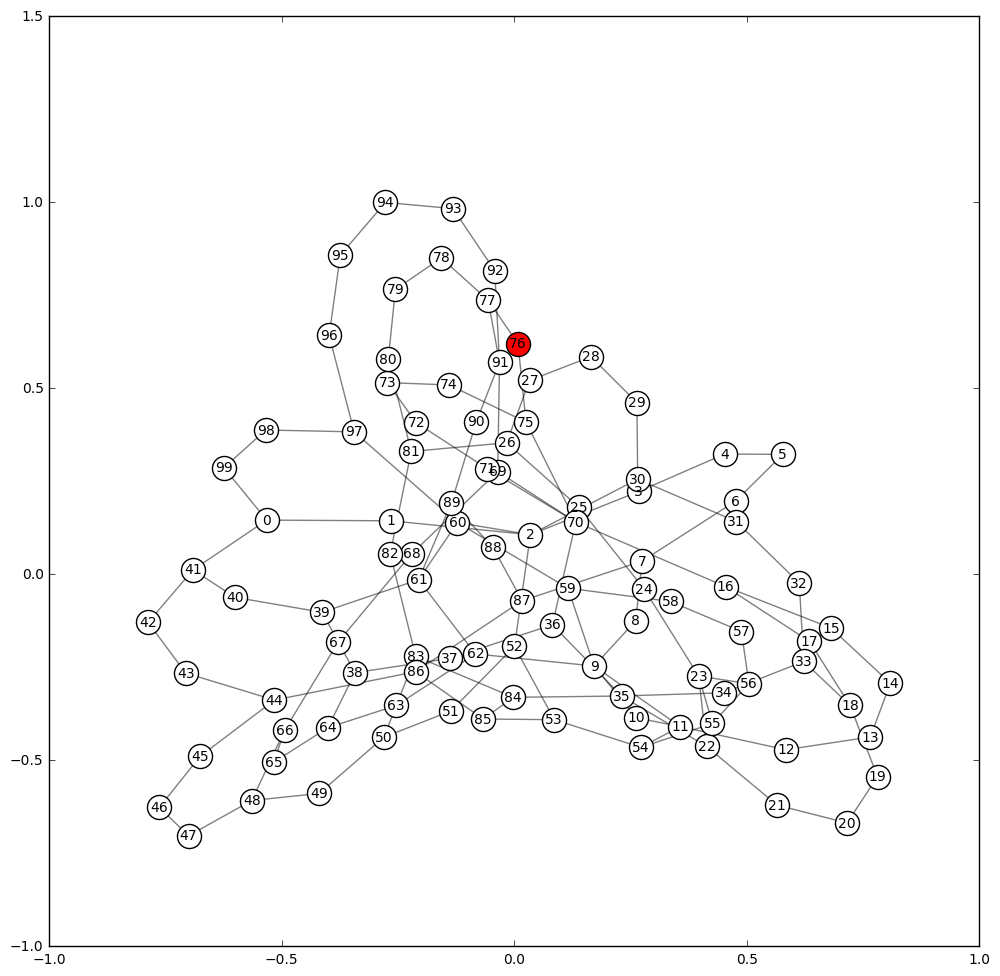

In [27]:
def draw_graph(g, g_layout):
    """
    Draw an SIR visualization.
    """
    # Now we can visualize the infected node's position
    node_map = {"S": [node_id for node_id in g.node if g.node[node_id]["state"] == "S"],
                "I": [node_id for node_id in g.node if g.node[node_id]["state"] == "I"],
                "R": [node_id for node_id in g.node if g.node[node_id]["state"] == "R"],
                }

    # Now we can visualize the infected node's position
    f = plt.figure(figsize=(12,12))
    nx.draw_networkx_nodes(g, g_layout,
                           nodelist=node_map["S"],
                           node_color="white")

    nx.draw_networkx_nodes(g, g_layout,
                           nodelist=node_map["I"],
                           node_color="red")

    nx.draw_networkx_nodes(g, g_layout,
                           nodelist=node_map["R"],
                           node_color="black")

    nx.draw_networkx_edges(g, g_layout, 
                           width=1.0, 
                           alpha=0.5)

    _ = nx.draw_networkx_labels(g, g_layout,
                            dict(zip(g.nodes(), g.nodes())),
                            font_size=10)
    
    ax = f.gca()
    ax.set_aspect(1./ax.get_data_ratio())   

draw_graph(g, g_layout)

In [28]:
# Probability of infection per edge
prob_infection = 1.0
prob_recovery = 0.5

# Track graph history
g_history = [copy.deepcopy(g)]

# Now run the model 
max_steps = 50
for step in xrange(max_steps):
    # Store changes
    new_infected = []
    new_recovered = []
    
    # Iterate over I and infect any S neighbors
    for node_id in g.nodes():
        if g.node[node_id]["state"] == "I":
            # Infect connected persons with prob_infection rate
            neighbors = g.neighbors(node_id)
            for neighbor_id in neighbors:
                if g.node[neighbor_id]["state"] == "S" \
                    and numpy.random.random() <= prob_infection:
                    new_infected.append(neighbor_id)
            
            # Recover with some rate
            if numpy.random.random() <= prob_recovery:
                new_recovered.append(node_id)
    
    # Update graph
    for node_id in g.nodes():
        if node_id in new_recovered:
            g.node[node_id]["state"] = "R"
        elif node_id in new_infected:
            g.node[node_id]["state"] = "I"

    # Track the latest step
    g_history.append(copy.deepcopy(g))

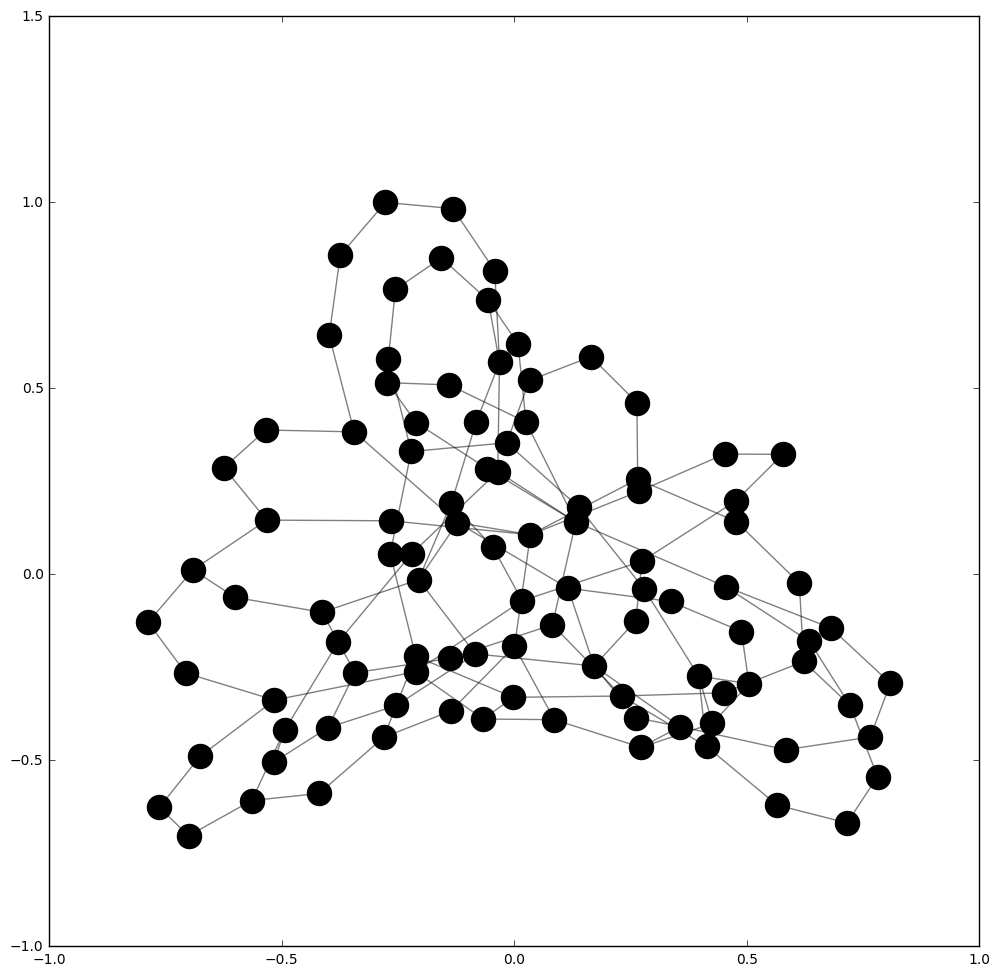

In [29]:
def display_graph_step(step=0):
    """
    Display a step from the graph history object.
    """
    draw_graph(g_history[step], g_layout)

interact(display_graph_step,
                step= widgets.IntSlider(min=0, max=len(g_history)-1,
                                     step=1))

Copyright (c) 2014, Michael Bommarito All rights reserved.

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

- Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

- Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE